# **Fine-Grained Aircraft Classification**
## By:
### Afnan Hussain     21L-5693
### Alaiba Nawaz      21L-5650
### Hammad Nazir      21L-8909

# **Importing Libraries**

In [200]:
import warnings
warnings.simplefilter(action='ignore')
import os

import cv2
from pathlib import Path
import imagesize
import random as random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
from sklearn import svm
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import LSTM, Dropout, Flatten, SimpleRNN, Input, Reshape, Permute, TimeDistributed
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch.optim as optim
import torch.nn as nn
from transformers import ViTModel, ViTForImageClassification, ViTFeatureExtractor
import torchvision.transforms.functional as TF
from torch.utils.data import DataLoader
from torchvision.transforms import RandomRotation, RandomHorizontalFlip, RandomVerticalFlip, ColorJitter
from torchvision.transforms import Resize, ToTensor, Normalize
from torch.utils.data import TensorDataset
from PIL import Image
from tensorflow import keras
import shap
from lime import lime_image

from tensorflow.keras.layers import Input, Dense, Reshape, Conv2DTranspose, Embedding, multiply, concatenate
from keras.layers import concatenate, UpSampling2D
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD, Adam

from sklearn.svm import SVC
from keras.applications.inception_v3 import preprocess_input
from sklearn.linear_model import LogisticRegression
import pickle


import glob
import imageio
import PIL
import time
from IPython import display
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler
import joblib
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
print(tf.__version__)
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (18,10)
import moviepy.editor as mpe

2.10.1


# **Checking GPU Availability**

In [2]:
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

Found GPU at: /device:GPU:0


# **Loading CSV Files**

In [3]:
# Load training, validation, and testing CSV files
train_df = pd.read_csv("archive/train.csv")
val_df = pd.read_csv("archive/val.csv")
test_df = pd.read_csv("archive/test.csv")

# **Train Dataframe**

In [130]:
train_df

filename  Classes  Labels
0     1025794.jpg  707-320       0
1     1340192.jpg  707-320       0
2     0056978.jpg  707-320       0
3     0698580.jpg  707-320       0
4     0450014.jpg  707-320       0
...           ...      ...     ...
3329  1577680.jpg   Yak-42      99
3330  1826676.jpg   Yak-42      99
3331  0472681.jpg   Yak-42      99
3332  1597829.jpg   Yak-42      99
3333  0197891.jpg   Yak-42      99

[3334 rows x 3 columns]

In [5]:
train_df.describe()

Labels
count  3334.00000
mean     49.50000
std      28.87623
min       0.00000
25%      24.25000
50%      49.50000
75%      74.75000
max      99.00000

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3334 entries, 0 to 3333
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  3334 non-null   object
 1   Classes   3334 non-null   object
 2   Labels    3334 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 78.3+ KB


# **Test Dataframe**

In [7]:
test_df

filename  Classes  Labels
0     1514522.jpg  707-320       0
1     0747566.jpg  707-320       0
2     1008575.jpg  707-320       0
3     0717480.jpg  707-320       0
4     0991569.jpg  707-320       0
...           ...      ...     ...
3328  0383400.jpg   Yak-42      99
3329  1117062.jpg   Yak-42      99
3330  0329381.jpg   Yak-42      99
3331  0523192.jpg   Yak-42      99
3332  0810303.jpg   Yak-42      99

[3333 rows x 3 columns]

In [8]:
test_df.describe()

Labels
count  3333.000000
mean     49.504950
std      28.867485
min       0.000000
25%      25.000000
50%      50.000000
75%      74.000000
max      99.000000

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  3333 non-null   object
 1   Classes   3333 non-null   object
 2   Labels    3333 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 78.2+ KB


# **Validation Dataframe**

In [10]:
val_df

filename  Classes  Labels
0     0481847.jpg  707-320       0
1     0810608.jpg  707-320       0
2     1514481.jpg  707-320       0
3     0887066.jpg  707-320       0
4     1318819.jpg  707-320       0
...           ...      ...     ...
3328  1203670.jpg   Yak-42      99
3329  0944182.jpg   Yak-42      99
3330  1340345.jpg   Yak-42      99
3331  0765754.jpg   Yak-42      99
3332  1594714.jpg   Yak-42      99

[3333 rows x 3 columns]

In [11]:
val_df.describe()

Labels
count  3333.000000
mean     49.495050
std      28.867485
min       0.000000
25%      25.000000
50%      49.000000
75%      74.000000
max      99.000000

In [11]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  3333 non-null   object
 1   Classes   3333 non-null   object
 2   Labels    3333 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 78.2+ KB


# **Class Distribution**

In [12]:
train_df['data_type'] = 'train'
test_df['data_type'] = 'test'
val_df['data_type'] = 'val'

# Concatenating the dataframes
combined_df = pd.concat([train_df, test_df, val_df], ignore_index=True)

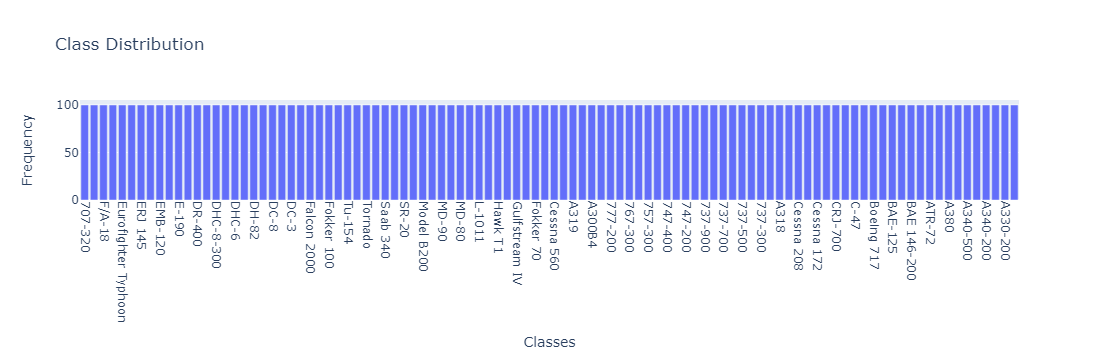

In [310]:
fig = px.bar(combined_df['Classes'].value_counts(),
             x=combined_df['Classes'].value_counts().index,
             y=combined_df['Classes'].value_counts().values,
             labels={'x':'Classes', 'y':'Frequency'},
             title='Class Distribution')
fig.update_xaxes(tickangle=90)
fig.show()

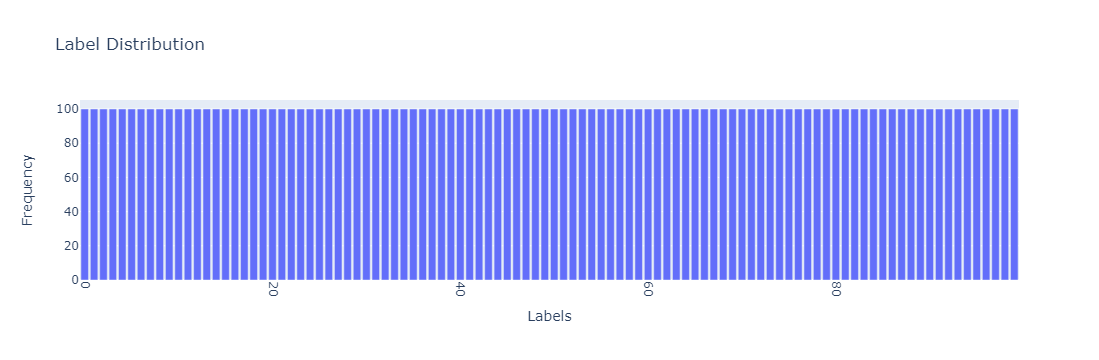

In [311]:
fig = px.bar(combined_df['Labels'].value_counts(),
             x=combined_df['Labels'].value_counts().index,
             y=combined_df['Labels'].value_counts().values,
             labels={'x':'Labels', 'y':'Frequency'},
             title='Label Distribution')
fig.update_xaxes(tickangle=90)
fig.show()

### The class is perfectly balanced with each class having 100 frequency

# **Choosing Image Size**

In [80]:
# Define the root directory where images are stored
root = "archive/fgvc-aircraft-2013b/fgvc-aircraft-2013b/data/images/"

# Get the Image Resolutions
imgs = [img.name for img in Path(root).iterdir() if img.suffix == ".jpg"]
img_meta = {}
for f in imgs:
    img_meta[str(f)] = imagesize.get(root + f)

# Convert it to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns')
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print(f'Total Number of Images: {len(img_meta_df)}')
img_meta_df.head()

Total Number of Images: 10000


FileName        Size  Width  Height  Aspect Ratio
0  0034309.jpg  (900, 687)    900     687          1.31
1  0034958.jpg  (971, 740)    971     740          1.31
2  0037511.jpg  (971, 740)    971     740          1.31
3  0037512.jpg  (971, 740)    971     740          1.31
4  0038598.jpg  (971, 740)    971     740          1.31

Text(0, 0.5, 'Height')

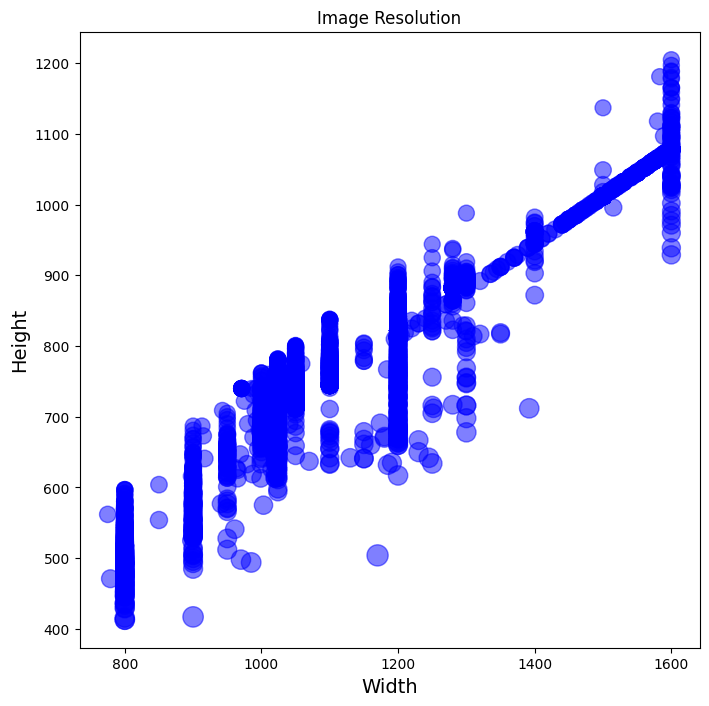

In [81]:
# Visualize Image Resolutions
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='blue', alpha=0.5, s=img_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

In [82]:
# Find the median dimensions
median_width = img_meta_df["Width"].median()
median_height = img_meta_df["Height"].median()

print("Median Width:", median_width)
print("Median Height:", median_height)

# Find the median aspect ratio
median_aspect_ratio = img_meta_df["Aspect Ratio"].median()
print("Median Aspect Ratio:", median_aspect_ratio)

# Choose the image size based on the median dimensions
img_size = (int(median_width), int(median_height))

print("Chosen Image Size:", img_size)


Median Width: 1024.0
Median Height: 699.0
Median Aspect Ratio: 1.47
Chosen Image Size: (1024, 699)


### As the chosen size (1024, 699) from data may be too large. It might result in more complexity and longer training time. Usually, a smaller, square image size is used, such as (224, 224) or (299, 299) for many popular pre-trained models. So we will use image size of **(299, 299)** 
[How to Pick the Optimal Image Size for Training Convolution Neural Network?](https://medium.com/analytics-vidhya/how-to-pick-the-optimal-image-size-for-training-convolution-neural-network-65702b880f05)

In [4]:
img_size = (299, 299)

# **Loading Images Function**

In [168]:
# Function to load images
def load_image(image_path, new_size=img_size):
    root = "archive/fgvc-aircraft-2013b/fgvc-aircraft-2013b/data/images/"
    # Read image
    img = cv2.imread(root + image_path)
    # Resize image
    img = cv2.resize(img, new_size)
    
    return img


# **Loading Labels Function**

In [202]:
# Function to load labels
def load_labels(train=train_df,test=test_df,val=val_df):
    y_train = np.array(train['Labels'].tolist())
    y_val = np.array(val['Labels'].tolist())
    y_test = np.array(test['Labels'].tolist())
    return y_train,y_val,y_test

y_train,y_val,y_test = load_labels()

# **Training Images**

In [170]:
def load_X_train(df):
    X_train = []
    for index, row in df.iterrows():
        img = load_image(row['filename'])
        X_train.append(img)
    return X_train

In [171]:
# Usage:
X_train = load_X_train(train_df)

## **Displaying First Three Images**

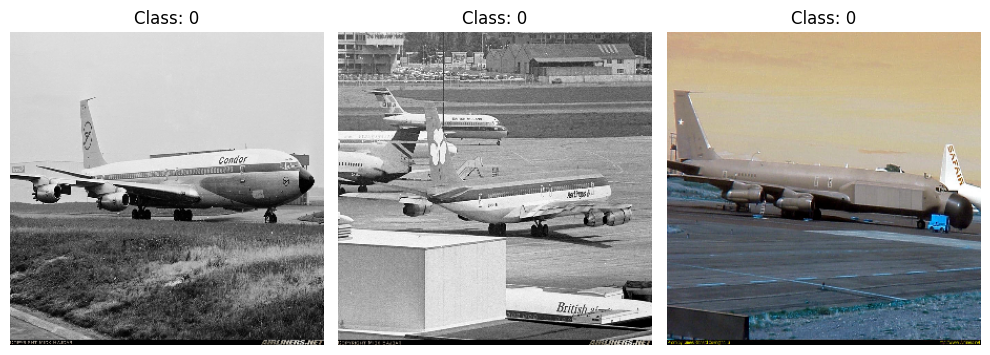

In [172]:
# Display the first three images in X_train
plt.figure(figsize=(10, 5))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(X_train[i])
    plt.title(f'Class: {y_train[i]}')
    plt.axis('off')  # Hide the axes

plt.tight_layout()
plt.show()

# **Testing Images**

In [173]:
def load_X_test(df):
    X_test = []
    for index, row in df.iterrows():
        img = load_image(row['filename'])
        X_test.append(img)
    return X_test

In [174]:
# Usage:
X_test = load_X_test(test_df)

## **Displaying First Three Images**

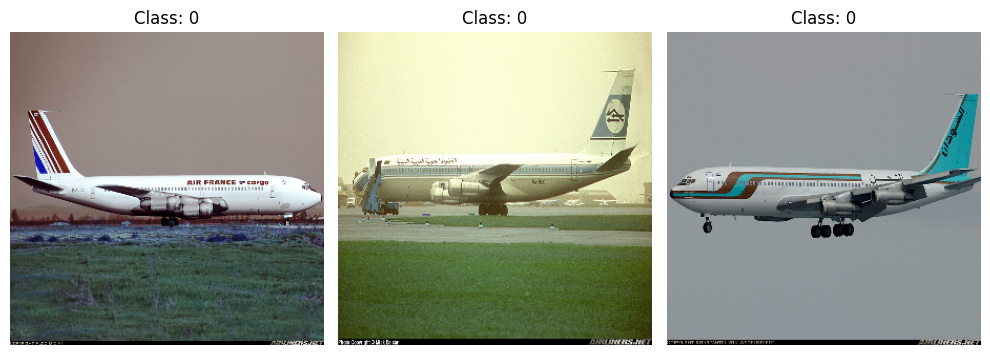

In [175]:
# Display the first three images in X_test
plt.figure(figsize=(10, 5))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(X_test[i])
    plt.title(f'Class: {y_test[i]}')
    plt.axis('off')  # Hide the axes

plt.tight_layout()
plt.show()

# **Validation Images**

In [176]:
def load_X_val(df):
    X_val = []
    for index, row in df.iterrows():
        img = load_image(row['filename'])
        X_val.append(img)
    return X_val

In [177]:
# Usage:
X_val = load_X_val(val_df)

## **Displaying First Three Images**

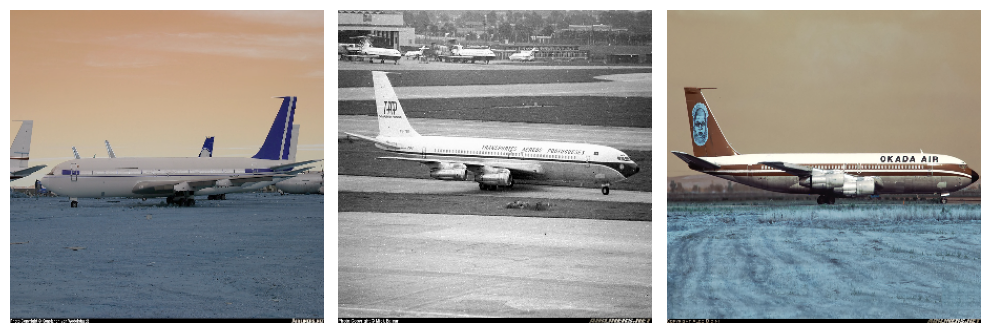

In [178]:
# Display the first three images in X_val
plt.figure(figsize=(10, 5))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(X_val[i])
    plt.axis('off')  # Hide the axes

plt.tight_layout()
plt.show()

# **Preprocessing Techniques Functions**

### **Picking a random image from X_train to show how all the preprocessing technique's functions work**

Randomly chosen image index = 703


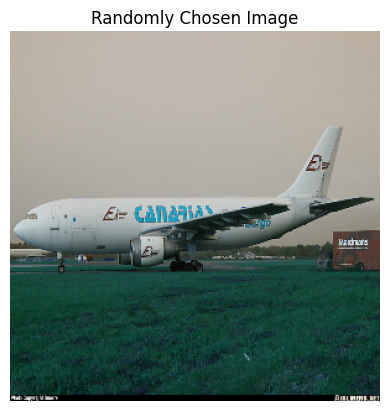

In [16]:
index = random.randint(0, len(X_train))
print(f"Randomly chosen image index = {index}")
plt.imshow(X_train[index])
plt.title("Randomly Chosen Image")
plt.axis('off')  # Hide the axes
plt.show()

In [17]:
random_image = X_train[index]

## **Image Resize Function**

In [18]:
def resize_img(image,new_size = img_size):
    image = cv2.resize(image, new_size)
    return image

## **Convert to Gray Scale Function**

In [19]:
def convert_to_gray_scale(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

### **Applying Gray Scale Function to Random Image**

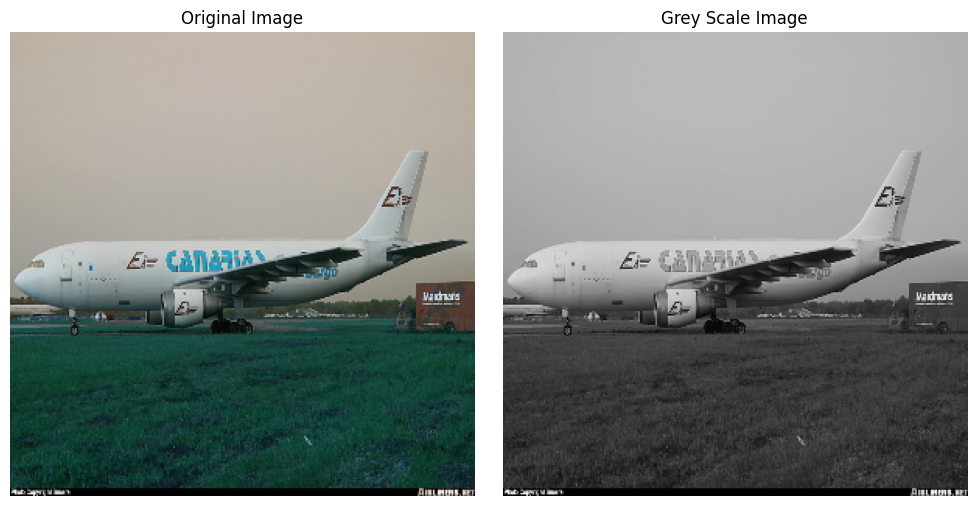

In [20]:
random_grey_image = convert_to_gray_scale(random_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(random_image)
plt.axis('off')  # Hide the axes
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(random_grey_image,cmap='gray')
plt.axis('off')  # Hide the axes
plt.title("Grey Scale Image")

plt.tight_layout()
plt.show()

## **Detect and Remove Noise From Image Function**

In [21]:
def detect_and_remove_noise(image):
    # Calculate histogram
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    
    # Identify noise type
    peak_value = np.argmax(hist)
    if peak_value < 30 or peak_value > 225:
        noise_type = 'Salt-and-Pepper'
    elif hist.std() > 20:
        noise_type = 'Gaussian'
    else:
        noise_type = 'Unknown'
    
    # Apply noise reduction techniques based on noise type
    if noise_type == 'Salt-and-Pepper':
        denoised_image = cv2.medianBlur(image, 5)
    elif noise_type == 'Gaussian':
        denoised_image = cv2.GaussianBlur(image, (5, 5), 0)
    else:
        denoised_image = image
        
    return denoised_image, noise_type

### **Applying Detect and Remove Noise Function to Image**

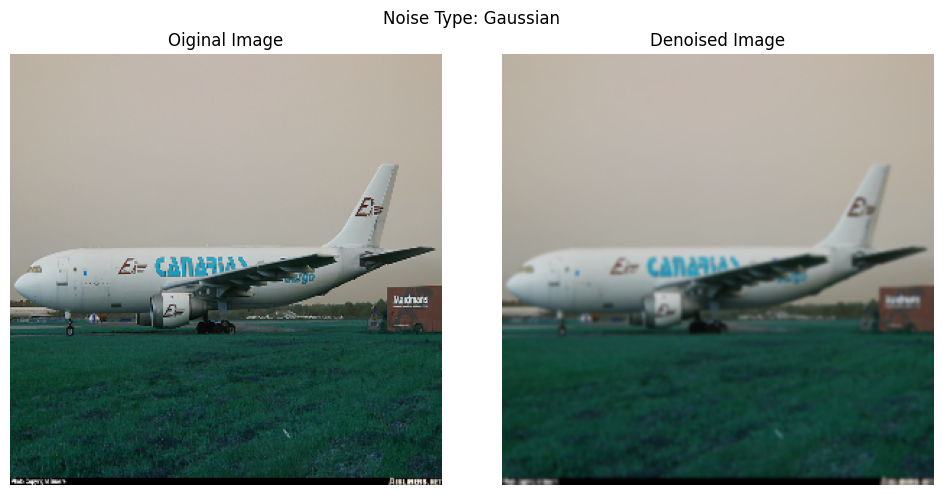

In [22]:
denoised_image, noise_type = detect_and_remove_noise(random_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(random_image)
plt.axis('off')  # Hide the axes
plt.title("Oiginal Image")

plt.subplot(1, 2, 2)
plt.imshow(denoised_image,cmap='gray')
plt.axis('off')  # Hide the axes
plt.title("Denoised Image")
plt.suptitle(f"Noise Type: {noise_type}")

plt.tight_layout()
plt.show()

## **Equalized Histogram Function**

In [23]:
def equalized_hist_image(image):
    eq_img = cv2.equalizeHist(image)
    return eq_img

### **Plotting Image and Histogram Function**

In [24]:
def make_hist(image,eq_image):
    
    plt.figure(figsize=(10, 5))

    plt.subplot(1,2,1)
    plt.imshow(image,cmap='gray')
    plt.title("Image Before")
    plt.axis('off')  # Hide the axes
    

    plt.subplot(1,2,2)
    hist , bins = np.histogram(image,bins=256, range=[0,256])
    plt.plot(hist)
    plt.title("Histogram 1")

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))

    plt.subplot(1,2,1)
    plt.imshow(eq_image,cmap='gray')
    plt.title("Image After")
    plt.axis('off')  # Hide the axes

    plt.subplot(1,2,2)
    hist , bins = np.histogram(eq_image,bins=256, range=[0,256])
    plt.plot(hist)
    plt.title("Histogram 2")

    plt.tight_layout()
    plt.show()

### **Applying Equalized Histogram on Grey Image**

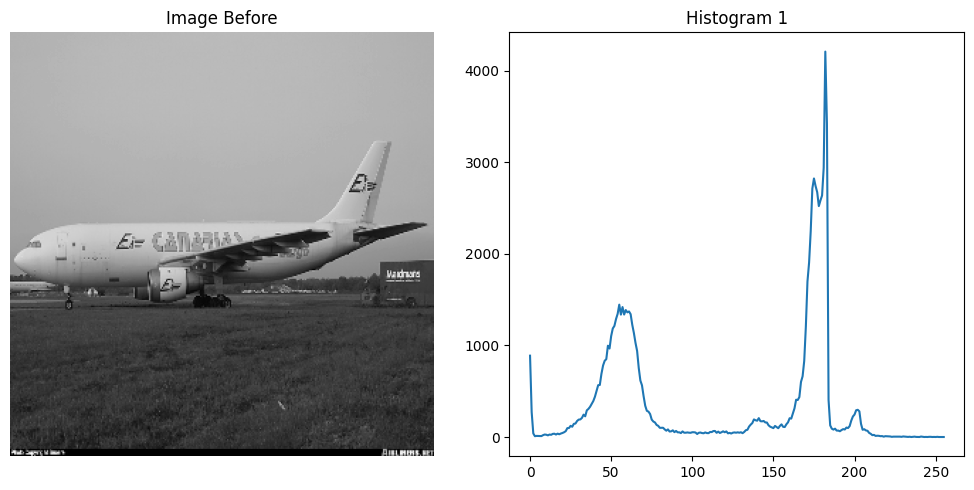

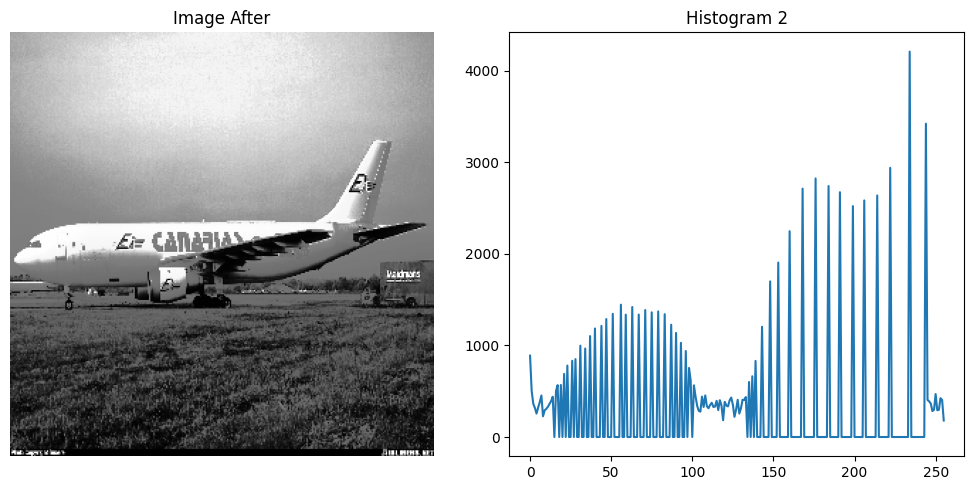

In [25]:
eq_image = equalized_hist_image(random_grey_image)
make_hist(random_grey_image, eq_image)

## **Normalize Pixel Function**

In [26]:
def normalize_pixel(image):
    normalized_image = (image / 255.0)
    return normalized_image

### **Applying Normalize Pixel Function to Denoised Image**

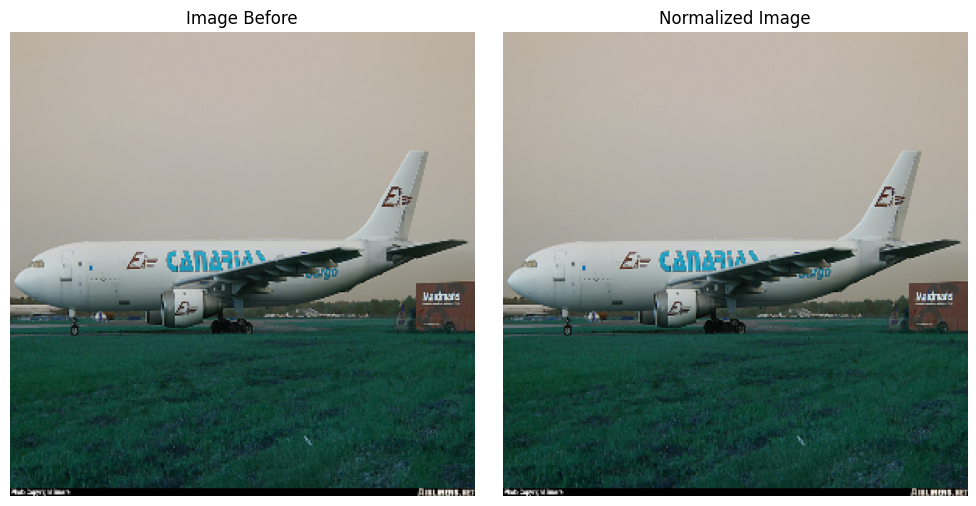

In [27]:
normalized_image = normalize_pixel(random_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(random_image)
plt.axis('off')  # Hide the axes
plt.title("Image Before")

plt.subplot(1, 2, 2)
plt.imshow(normalized_image)
plt.axis('off')  # Hide the axes1
plt.title("Normalized Image")


plt.tight_layout()
plt.show()

# **Preprocessing**

## **Preprocessing Function**

In [28]:
def preprocessing_image(image):
    
    gray_image = convert_to_gray_scale(image)  # Convert image to gray scale
    
    denoised_image, _ = detect_and_remove_noise(gray_image)  # Detecting and removing noise from image
    
    eq_image = equalized_hist_image(denoised_image)  # Equalized histogram image
    
    normalized_image = normalize_pixel(eq_image)  # Normalizing pixel values of image
    
    return normalized_image


## **Applying Preprocessing Function to X_train Images**

In [179]:
X_train = [preprocessing_image(image) for image in X_train]
X_train = np.array(X_train)

## **Applying Preprocessing Function to X_test Images**

In [180]:
X_test = [preprocessing_image(image) for image in X_test]
X_test = np.array(X_test)

## **Applying Preprocessing Function to X_val Images**

In [181]:
X_val = [preprocessing_image(image) for image in X_val]
X_val = np.array(X_val)

# **Applying Models**

## **Deep Learning Models**

### **CNN Trained with Preprocessed Data**

#### **Model Training**

In [39]:
# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(299, 299, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')  # Output layer for 100 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0

In [40]:
# Train the model
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val))
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

Epoch 1/15
105/105 [==============================] - 19s 132ms/step - loss: 4.6969 - accuracy: 0.0069 - val_loss: 4.6052 - val_accuracy: 0.0102
Epoch 2/15
105/105 [==============================] - 13s 120ms/step - loss: 4.6060 - accuracy: 0.0081 - val_loss: 4.6052 - val_accuracy: 0.0102
Epoch 3/15
105/105 [==============================] - 13s 121ms/step - loss: 4.6060 - accuracy: 0.0090 - val_loss: 4.6052 - val_accuracy: 0.0099
Epoch 4/15
105/105 [==============================] - 13s 121ms/step - loss: 4.6069 - accuracy: 0.0102 - val_loss: 4.6041 - val_accuracy: 0.0123
Epoch 5/15
105/105 [==============================] - 13s 121ms/step - loss: 4.5726 - accuracy: 0.0186 - val_loss: 4.4246 - val_accuracy: 0.0381
Epoch 6/15
105/105 [==============================] - 13s 123ms/step - loss: 3.7783 - accuracy: 0.1632 - val_loss: 4.0976 - val_accuracy: 0.1101
Epoch 7/15
105/105 [==============================] - 13s 123ms/step - loss: 2.0585 - accuracy: 0.5033 - val_loss: 4.3810 - val_ac

In [33]:
cnn_test_loss_1, cnn_test_accuracy_1 = cnn_model_1.evaluate(X_test, y_test)
print("Test accuracy:", cnn_test_accuracy_1)

105/105 [==============================] - 7s 25ms/step - loss: 7.4537 - accuracy: 0.1170
Test accuracy: 0.11701170355081558


#### **Plotting Model's Accuracy**

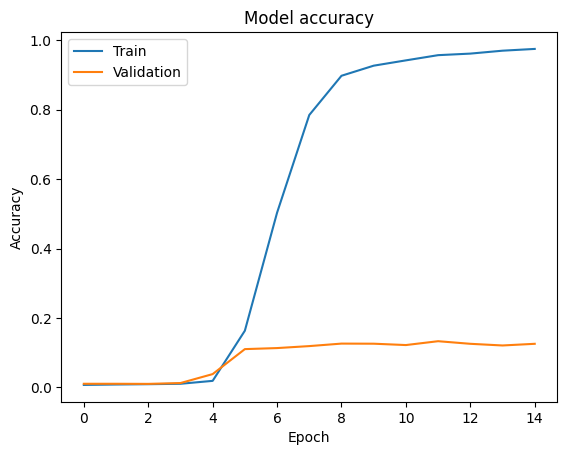

In [42]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### **Plotting Model's Loss**

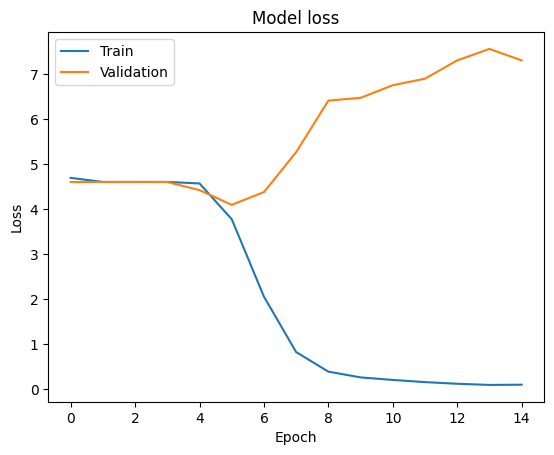

In [43]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### **Evaluating Model**

In [34]:
# Predict classes
predictions = cnn_model_1.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = test_df['Labels'].values

# Calculate precision, recall, and F1-score
cnn_precision_1 = precision_score(true_classes, predicted_classes, average='macro')
cnn_recall_1 = recall_score(true_classes, predicted_classes, average='macro')
cnn_f1_1 = f1_score(true_classes, predicted_classes, average='macro')

print("Precision: {:.4f}".format(cnn_precision_1))
print("Recall: {:.4f}".format(cnn_recall_1))
print("F1 Score: {:.4f}".format(cnn_f1_1))


105/105 [==============================] - 2s 23ms/step
Precision: 0.1302
Recall: 0.1170
F1 Score: 0.1163


#### **Saving and Loading**

In [44]:
# Saving model
model.save("cnn_model_1.h5")

In [32]:
# Load the saved model
cnn_model_1 = load_model("cnn_model_1.h5")

#### **Explainable AI**

In [29]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    ## First, we create a model that maps the input image to the activations
    ## of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    ## Then, we compute the gradient of the top predicted class for our input image
    ## for the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    ## We are doing transfer learning on last layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    ## This is a vector where each entry is the mean intensity of the gradient
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    ## calculates a heatmap highlighting the regions of importance in an image
    ## for a specific 
    ## predicted class by combining the output of the last convolutional layer
    ## with the pooled gradients.
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    ## For visualization purpose
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

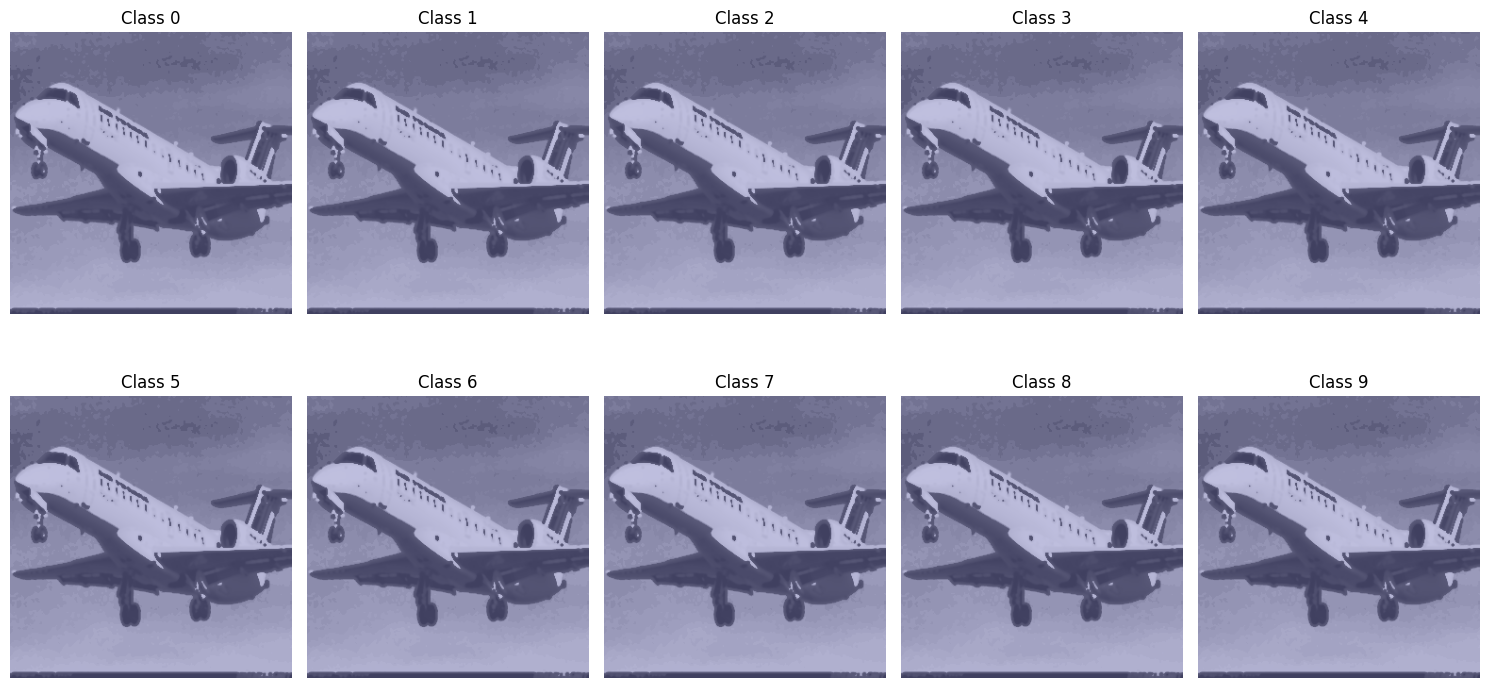

In [78]:
# Select a random image index from X_train
random_index = np.random.randint(0, len(X_train))
img = np.expand_dims(X_train[random_index], axis=0)

# Define the target layer for Grad-CAM
layer_name = 'conv2d_2'  # Choose the target convolutional layer

# Generate Grad-CAM for each class
plt.figure(figsize=(15, 8))
for class_index in range(10):  # Visualize Grad-CAM for 10 classes
    # Generate Grad-CAM
    cam = make_gradcam_heatmap(img, cnn_model_1, layer_name, class_index)
    heatmap_resized = cv2.resize(cam[0], (img.shape[2], img.shape[1]))
    # Visualize the Grad-CAM for the current class
    plt.subplot(2, 5, class_index + 1)  # 2 rows, 5 columns layout
    plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
    plt.imshow(img[0, :, :], cmap='gray', alpha=0.5)
    plt.title(f'Class {class_index}')
    plt.axis('off')

plt.tight_layout()
plt.show()


### **CNN Trained with Data Augmentation**

#### **Data Augmentation**

In [147]:
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [148]:
# Define the data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator( # No augmentation on val data
)

test_datagen = ImageDataGenerator(  # No augmentation on test data
)

# Making generators X_train, X_val and X_test
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
validation_generator = val_datagen.flow(X_val, y_val, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

#### **Model Training**

In [67]:
# Define the CNN architecture
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(299, 299, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')  # Output layer for 100 classes
])

# Compile the model
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 297, 297, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 148, 148, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 35, 35, 128)     

In [96]:
# Fit the model using the generators
history = model_2.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,  # Number of steps per epoch when using generators
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(X_val) // 32,  # Steps for validation
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

Epoch 1/50
104/104 [==============================] - 13s 117ms/step - loss: 3.4054 - accuracy: 0.1799 - val_loss: 3.3924 - val_accuracy: 0.1869
Epoch 2/50
104/104 [==============================] - 12s 113ms/step - loss: 3.3364 - accuracy: 0.1947 - val_loss: 3.4746 - val_accuracy: 0.1758
Epoch 3/50
104/104 [==============================] - 12s 114ms/step - loss: 3.3251 - accuracy: 0.1908 - val_loss: 3.3404 - val_accuracy: 0.1938
Epoch 4/50
104/104 [==============================] - 12s 113ms/step - loss: 3.2144 - accuracy: 0.2117 - val_loss: 3.2975 - val_accuracy: 0.2052
Epoch 5/50
104/104 [==============================] - 12s 113ms/step - loss: 3.1577 - accuracy: 0.2099 - val_loss: 3.2912 - val_accuracy: 0.2067
Epoch 6/50
104/104 [==============================] - 12s 113ms/step - loss: 3.1489 - accuracy: 0.2235 - val_loss: 3.2252 - val_accuracy: 0.2160
Epoch 7/50
104/104 [==============================] - 12s 112ms/step - loss: 3.1006 - accuracy: 0.2302 - val_loss: 3.2244 - val_ac

In [149]:
cnn_test_loss_2, cnn_test_accuracy_2 = cnn_model_2.evaluate(test_generator)
print("Test accuracy:", cnn_test_accuracy_2)

105/105 [==============================] - 3s 23ms/step - loss: 3.0170 - accuracy: 0.2808
Test accuracy: 0.2808280885219574


#### **Plotting Model's Accuracy**

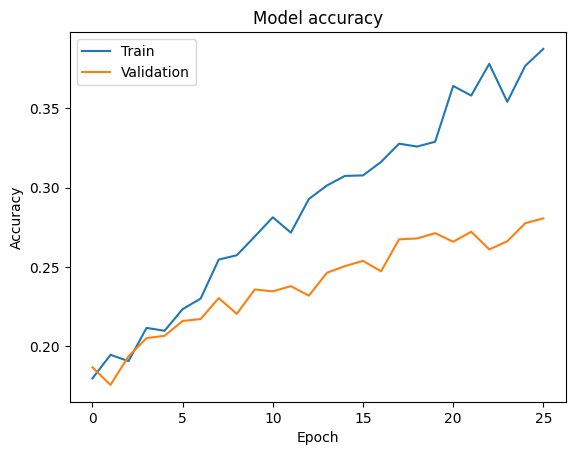

In [98]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### **Plotting Model's Loss**

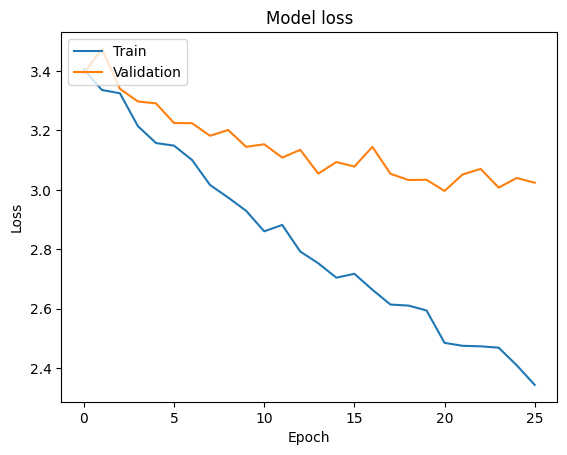

In [99]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### **Evaluating Model**

In [150]:
# Predict classes
predictions = cnn_model_2.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = test_df['Labels'].values

# Calculate precision, recall, and F1-score
cnn_precision_2 = precision_score(true_classes, predicted_classes, average='macro')
cnn_recall_2 = recall_score(true_classes, predicted_classes, average='macro')
cnn_f1_2 = f1_score(true_classes, predicted_classes, average='macro')

print("Precision: {:.4f}".format(cnn_precision_2))
print("Recall: {:.4f}".format(cnn_recall_2))
print("F1 Score: {:.4f}".format(cnn_f1_2))


105/105 [==============================] - 2s 22ms/step
Precision: 0.0080
Recall: 0.0075
F1 Score: 0.0075


#### **Saving and Loading**

In [100]:
# Saving model
model_2.save("cnn_model_2.h5")

In [ ]:
# Load the saved model
cnn_model_2 = load_model("cnn_model_2.h5")

#### **Explainable AI**

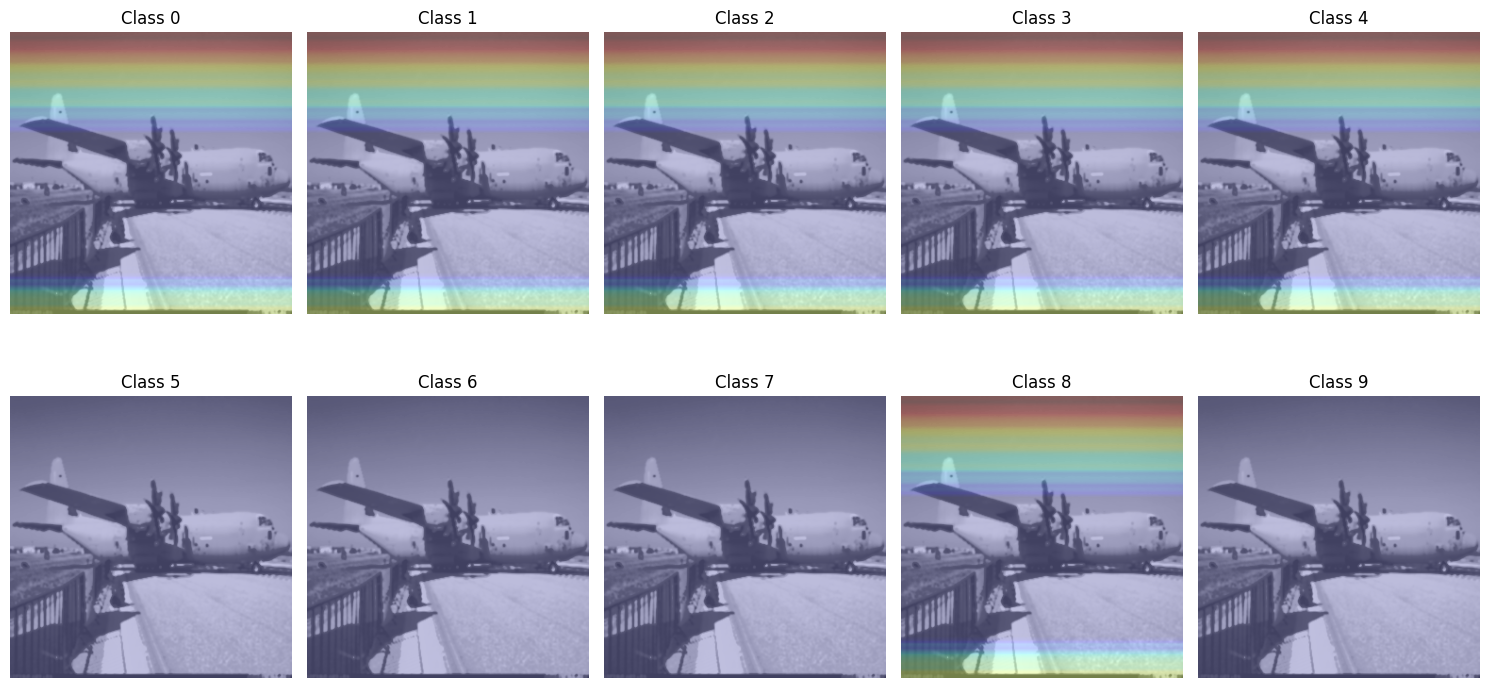

In [74]:
# Select a random image index from X_train
random_index = np.random.randint(0, len(X_train))
img = np.expand_dims(X_train[random_index], axis=0)

# Define the target layer for Grad-CAM
layer_name = 'conv2d_8'  # Choose the target convolutional layer

# Generate Grad-CAM for each class
plt.figure(figsize=(15, 8))
for class_index in range(10):  # Visualize Grad-CAM for 10 classes
    # Generate Grad-CAM
    cam = make_gradcam_heatmap(img, cnn_model_2, layer_name, class_index)
    heatmap_resized = cv2.resize(cam[0], (img.shape[2], img.shape[1]))
    # Visualize the Grad-CAM for the current class
    plt.subplot(2, 5, class_index + 1)  # 2 rows, 5 columns layout
    plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
    plt.imshow(img[0, :, :], cmap='gray', alpha=0.5)
    plt.title(f'Class {class_index}')
    plt.axis('off')

plt.tight_layout()
plt.show()


### **Transfer Learning: ResNet-50**

#### **Data Prepration**

In [41]:
#Loading the images again because ResNet-50 requires pictures in RGB format
X_train = load_X_train(train_df)
X_val = load_X_val(val_df)
X_test = load_X_test(test_df)

# Converting to numpy
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

In [42]:
num_classes = 100
# One-hot encode the target labels
y_train_encoded = to_categorical(y_train, num_classes)
y_val_encoded = to_categorical(y_val, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

In [43]:
# Define the data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator( # No augmentation on val data
)

test_datagen = ImageDataGenerator(  # No augmentation on test data
)

# Making generators X_train, X_val and X_test
train_generator = train_datagen.flow(X_train, y_train_encoded, batch_size=32)
validation_generator = val_datagen.flow(X_val, y_val_encoded, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test_encoded, batch_size=32)

#### **Model Training**

In [20]:
# Load the ResNet50 model with pre-trained weights (excluding top fully connected layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)  # num_classes is the number of output classes

# Create the final model
res_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
res_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

res_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 305, 305, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 150, 150, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [33]:
 # Train the model
history = res_model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=len(X_val) // 32
)

Epoch 1/30
104/104 [==============================] - 57s 543ms/step - loss: 1.3103 - accuracy: 0.5860 - val_loss: 4.8873 - val_accuracy: 0.1800
Epoch 2/30
104/104 [==============================] - 57s 542ms/step - loss: 1.2605 - accuracy: 0.5963 - val_loss: 4.8646 - val_accuracy: 0.2605
Epoch 3/30
104/104 [==============================] - 57s 542ms/step - loss: 1.0972 - accuracy: 0.6357 - val_loss: 3.4350 - val_accuracy: 0.2596
Epoch 4/30
104/104 [==============================] - 57s 542ms/step - loss: 1.0576 - accuracy: 0.6520 - val_loss: 3.0728 - val_accuracy: 0.3053
Epoch 5/30
104/104 [==============================] - 56s 542ms/step - loss: 0.9646 - accuracy: 0.6805 - val_loss: 2.5044 - val_accuracy: 0.3978
Epoch 6/30
104/104 [==============================] - 57s 542ms/step - loss: 0.9665 - accuracy: 0.6863 - val_loss: 2.5096 - val_accuracy: 0.3828
Epoch 7/30
104/104 [==============================] - 57s 542ms/step - loss: 0.8676 - accuracy: 0.7193 - val_loss: 3.5286 - val_ac

In [46]:
res_test_loss, res_test_accuracy = res_model.evaluate(test_generator)
print("Test accuracy:", res_test_accuracy)

105/105 [==============================] - 13s 113ms/step - loss: 2.7829 - accuracy: 0.5092
Test accuracy: 0.5091509222984314


#### **Plotting Model's Accuracy**

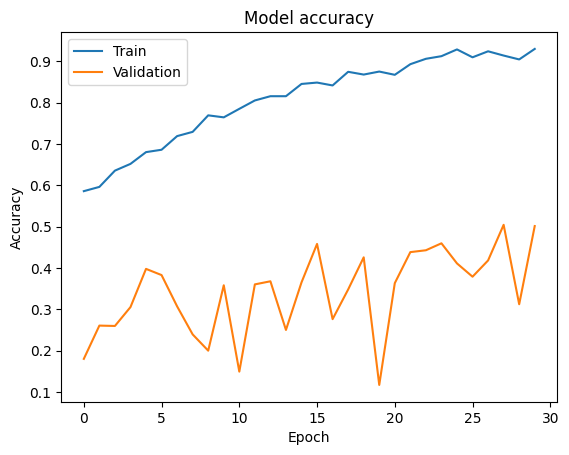

In [35]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### **Plotting Model's Loss**

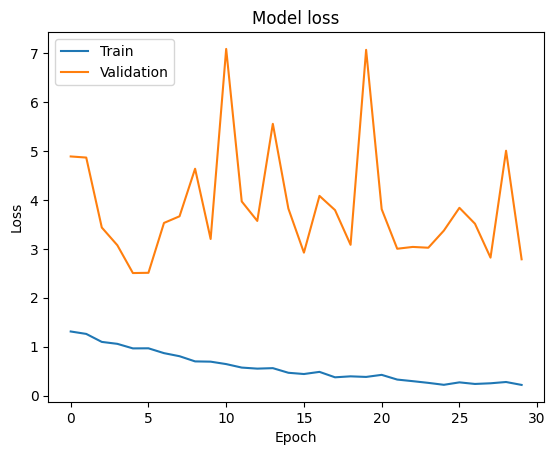

In [36]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### **Evaluating Model**

In [45]:
# Predict classes
predictions = res_model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = test_df['Labels'].values

# Calculate precision, recall, and F1-score
res_precision = precision_score(true_classes, predicted_classes, average='macro')
res_recall = recall_score(true_classes, predicted_classes, average='macro')
res_f1 = f1_score(true_classes, predicted_classes, average='macro')

print("Precision: {:.4f}".format(res_precision))
print("Recall: {:.4f}".format(res_recall))
print("F1 Score: {:.4f}".format(res_f1))


105/105 [==============================] - 13s 111ms/step
Precision: 0.0095
Recall: 0.0102
F1 Score: 0.0094


#### **Saving and Loading Model**

In [38]:
# Saving model
res_model.save("res_model.h5")

In [44]:
# Load the saved model
res_model = load_model("res_model.h5")

#### **Explainable AI**

In [119]:
def predict_fn(images):
    return res_model.predict(images)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


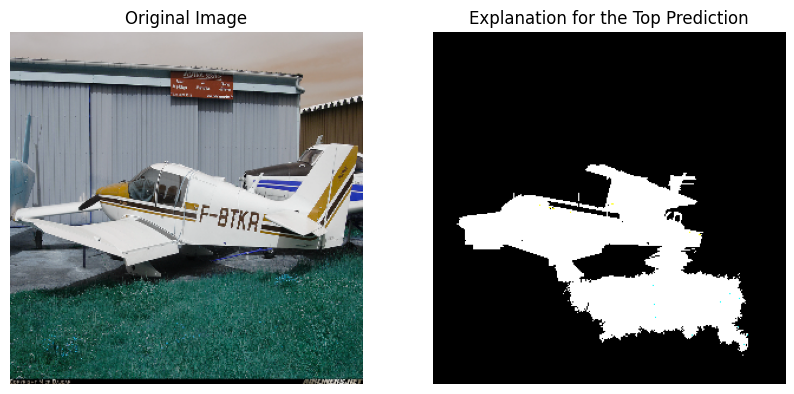

In [128]:
# Select a random image index from X_train
random_index = np.random.randint(0, len(X_train))
img = X_train[random_index]
x = np.expand_dims(img, axis=0)
# Use LIME to explain the predictions
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(x[0], predict_fn, top_labels=10, hide_color=0, num_samples=1000)

# Visualize the original image and the explanation side by side
plt.figure(figsize=(10, 5))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Plot explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.subplot(1, 2, 2)
plt.imshow(temp)
plt.title('Explanation for the Top Prediction')
plt.axis('off')

plt.show()

1/1 [==============================] - 0s 17ms/step


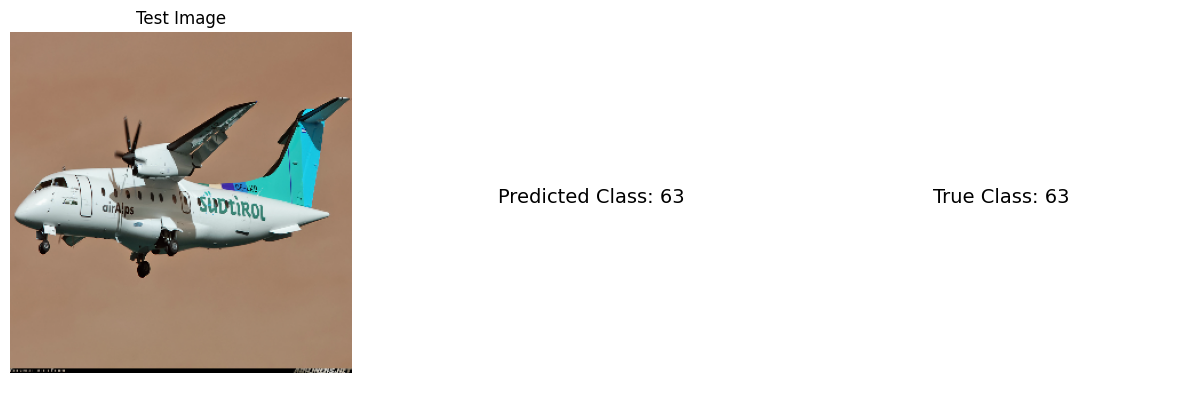

In [140]:
# Select a random test image index
random_index = np.random.randint(0, len(X_test))
test_img = np.expand_dims(X_test[random_index], axis=0)

class_labels = [i for i in range(100)]

# Predict the class probabilities for the test image
class_probabilities = res_model.predict(test_img)[0]

# Get the predicted class index and label
predicted_class_index = np.argmax(class_probabilities)
predicted_class_label = class_labels[predicted_class_index]

# Get the true class index and label
true_class_index = y_test[random_index]
true_class_label = class_labels[true_class_index]

# Display the random test image, predicted class, and true class
plt.figure(figsize=(15, 5))

# Plot the test image
plt.subplot(1, 3, 1)
plt.imshow(test_img[0])
plt.title('Test Image')
plt.axis('off')

# Display the predicted class label
plt.subplot(1, 3, 2)
plt.text(0.5, 0.5, 'Predicted Class: ' + str(predicted_class_label), fontsize=14, ha='center')
plt.axis('off')

# Display the true class label
plt.subplot(1, 3, 3)
plt.text(0.5, 0.5, 'True Class: ' + str(true_class_index), fontsize=14, ha='center')
plt.axis('off')

plt.show()

### **Transfer Learning: VGG19**

#### **Model Training**

In [14]:
# get the VGG19 model
vgg_layers = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=False, input_shape=(299,299,3))
#we are adding our own layer
# Add custom classification head
x = vgg_layers.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)  # num_classes is the number of output classes

# Create the final model
vgg_model = Model(inputs=vgg_layers.input, outputs=predictions)

# Compile the model
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 299, 299, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 299, 299, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 149, 149, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 149, 149, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 149, 149, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 74, 74, 128)       0     

In [16]:
 # Train the model
with tf.device(device_name):
    history = vgg_model.fit(
        train_generator,
        steps_per_epoch=len(X_train) // 32,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=len(X_val) // 32
    )

Epoch 1/10
104/104 [==============================] - 117s 1s/step - loss: 4.9336 - accuracy: 0.0103 - val_loss: 4.6052 - val_accuracy: 0.0099
Epoch 2/10
104/104 [==============================] - 107s 1s/step - loss: 4.6061 - accuracy: 0.0094 - val_loss: 4.6052 - val_accuracy: 0.0099
Epoch 3/10
104/104 [==============================] - 107s 1s/step - loss: 4.6060 - accuracy: 0.0082 - val_loss: 4.6052 - val_accuracy: 0.0099
Epoch 4/10
104/104 [==============================] - 107s 1s/step - loss: 4.6060 - accuracy: 0.0091 - val_loss: 4.6052 - val_accuracy: 0.0099
Epoch 5/10
104/104 [==============================] - 106s 1s/step - loss: 4.6059 - accuracy: 0.0097 - val_loss: 4.6052 - val_accuracy: 0.0099
Epoch 6/10
104/104 [==============================] - 106s 1s/step - loss: 4.6058 - accuracy: 0.0088 - val_loss: 4.6052 - val_accuracy: 0.0099
Epoch 7/10
104/104 [==============================] - 106s 1s/step - loss: 4.6059 - accuracy: 0.0064 - val_loss: 4.6053 - val_accuracy: 0.0099

In [49]:
vgg_test_loss, vgg_test_accuracy = vgg_model.evaluate(test_generator)
print("Test accuracy:", vgg_test_accuracy)

105/105 [==============================] - 27s 195ms/step - loss: 4.6052 - accuracy: 0.0099
Test accuracy: 0.009900989942252636


#### **Plotting Model's Accuracy**

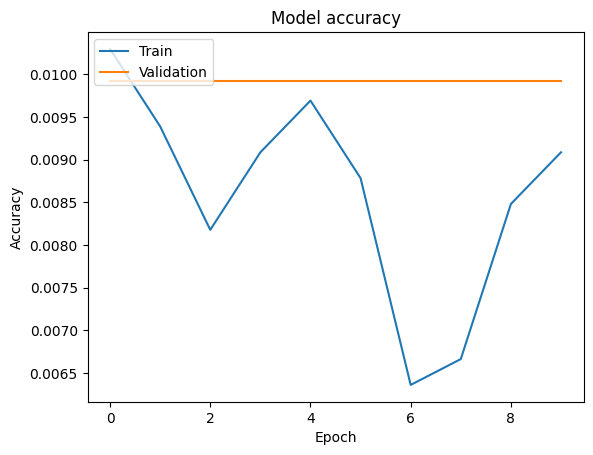

In [18]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### **Plotting Model's Loss**

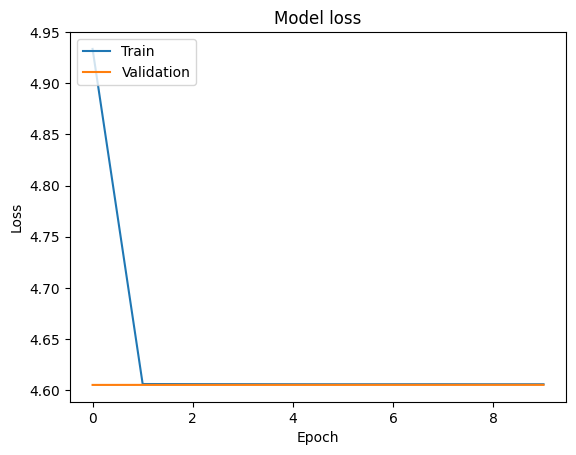

In [19]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### **Evaluating Model**

In [50]:
# Predict classes
predictions = vgg_model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = test_df['Labels'].values

# Calculate precision, recall, and F1-score
vgg_precision = precision_score(true_classes, predicted_classes, average='macro')
vgg_recall = recall_score(true_classes, predicted_classes, average='macro')
vgg_f1 = f1_score(true_classes, predicted_classes, average='macro')

print("Precision: {:.4f}".format(vgg_precision))
print("Recall: {:.4f}".format(vgg_recall))
print("F1 Score: {:.4f}".format(vgg_f1))


105/105 [==============================] - 19s 185ms/step
Precision: 0.0001
Recall: 0.0100
F1 Score: 0.0002


#### **Saving and Loading Model**

In [21]:
# Saving model
vgg_model.save("vgg_model.h5")

In [48]:
# Load the saved model
vgg_model = load_model("vgg_model.h5")

#### **Explainable AI**

In [142]:
def predict_vgg(images):
    return res_model.predict(images)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


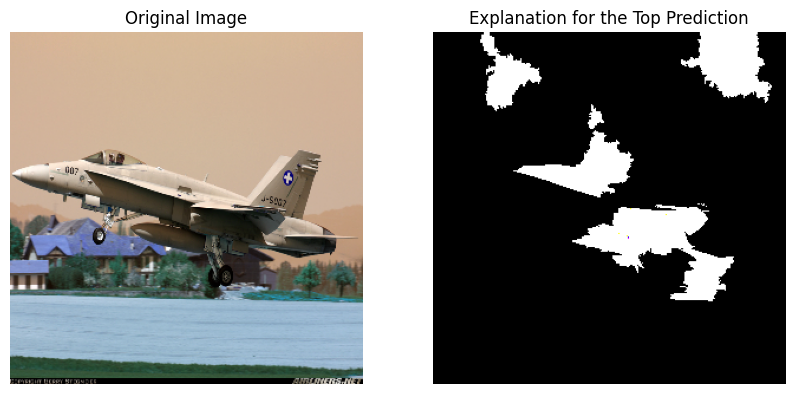

In [143]:
# Select a random image index from X_train
random_index = np.random.randint(0, len(X_train))
img = X_train[random_index]
x = np.expand_dims(img, axis=0)
# Use LIME to explain the predictions
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(x[0], predict_vgg, top_labels=10, hide_color=0, num_samples=1000)

# Visualize the original image and the explanation side by side
plt.figure(figsize=(10, 5))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Plot explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.subplot(1, 2, 2)
plt.imshow(temp)
plt.title('Explanation for the Top Prediction')
plt.axis('off')

plt.show()

### **Multi Layer Preceptron MLP**

#### **Data Preparation**

In [66]:
X_train = np.expand_dims(X_train, axis=-1) # Using preprocessed images
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [67]:
# Define the data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator( # No augmentation on val data
)

test_datagen = ImageDataGenerator(  # No augmentation on test data
)

# Making generators X_train, X_val and X_test
train_generator = train_datagen.flow(X_train, y_train, batch_size=16)
validation_generator = val_datagen.flow(X_val, y_val, batch_size=16)
test_generator = test_datagen.flow(X_test, y_test, batch_size=16)

#### **Model Training**

In [63]:
# Model configuration
input_shape = (299, 299, 1)
num_classes = 100

# Build the MLP model
model_mlp = Sequential([
    Flatten(input_shape=(299, 299, 1)),
    Dense(512, activation='relu'),
    BatchNormalization(),  # Batch normalization layer
    Dense(256, activation='relu'),
    BatchNormalization(),  # Batch normalization layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout regularization
    Dense(num_classes, activation='softmax')
])

model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_mlp.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 89401)             0         
                                                                 
 dense_25 (Dense)            (None, 512)               45773824  
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_26 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_27 (Dense)            (None, 128)              

In [64]:
# Fit the model using the generators
history = model_mlp.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
209/209 [==============================] - 11s 49ms/step - loss: 4.9557 - accuracy: 0.0141 - val_loss: 4.9403 - val_accuracy: 0.0135
Epoch 2/20
209/209 [==============================] - 10s 48ms/step - loss: 4.7662 - accuracy: 0.0108 - val_loss: 4.9420 - val_accuracy: 0.0132
Epoch 3/20
209/209 [==============================] - 10s 48ms/step - loss: 4.6920 - accuracy: 0.0102 - val_loss: 4.6237 - val_accuracy: 0.0129
Epoch 4/20
209/209 [==============================] - 10s 48ms/step - loss: 4.6428 - accuracy: 0.0168 - val_loss: 4.5778 - val_accuracy: 0.0165
Epoch 5/20
209/209 [==============================] - 10s 48ms/step - loss: 4.6224 - accuracy: 0.0132 - val_loss: 4.5523 - val_accuracy: 0.0183
Epoch 6/20
209/209 [==============================] - 10s 48ms/step - loss: 4.6074 - accuracy: 0.0144 - val_loss: 4.5540 - val_accuracy: 0.0207
Epoch 7/20
209/209 [==============================] - 10s 48ms/step - loss: 4.5891 - accuracy: 0.0138 - val_loss: 4.5449 - val_accuracy:

In [70]:
mlp_test_loss, mlp_test_acc = model_mlp.evaluate(X_test, y_test)
print(f'Test accuracy: {mlp_test_acc}')

105/105 [==============================] - 0s 3ms/step - loss: 4.5154 - accuracy: 0.0240
Test accuracy: 0.024002401158213615


#### **Ploting Model's Accuracy**

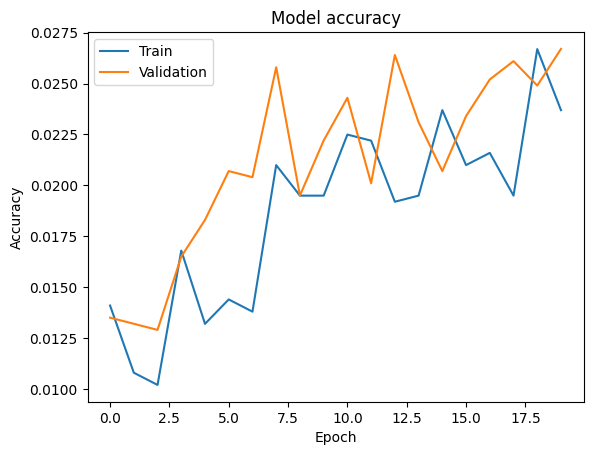

In [67]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### **Ploting Model's Loss**

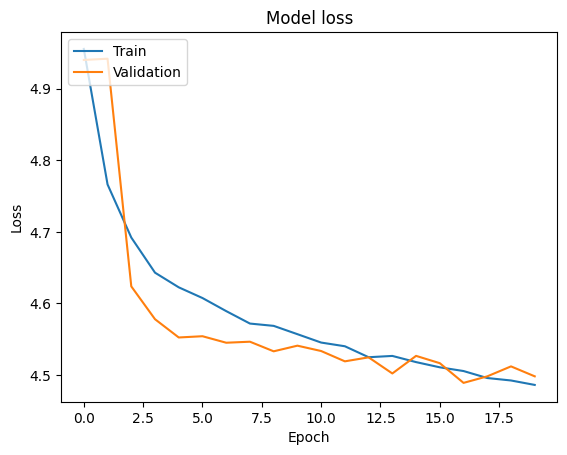

In [66]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### **Evaluating Model**

In [71]:
# Predict classes
predictions = model_mlp.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = test_df['Labels'].values

# Calculate precision, recall, and F1-score
mlp_precision = precision_score(true_classes, predicted_classes, average='macro')
mlp_recall = recall_score(true_classes, predicted_classes, average='macro')
mlp_f1 = f1_score(true_classes, predicted_classes, average='macro')

print("Precision: {:.4f}".format(mlp_precision))
print("Recall: {:.4f}".format(mlp_recall))
print("F1 Score: {:.4f}".format(mlp_f1))


209/209 [==============================] - 1s 4ms/step
Precision: 0.0057
Recall: 0.0116
F1 Score: 0.0058


#### **Saving and Loading Model**

In [69]:
# Saving model
model_mlp.save("mlp_model.h5")

In [69]:
# Load the saved model
model_mlp = load_model("mlp_model.h5")

#### **Explainable AI**

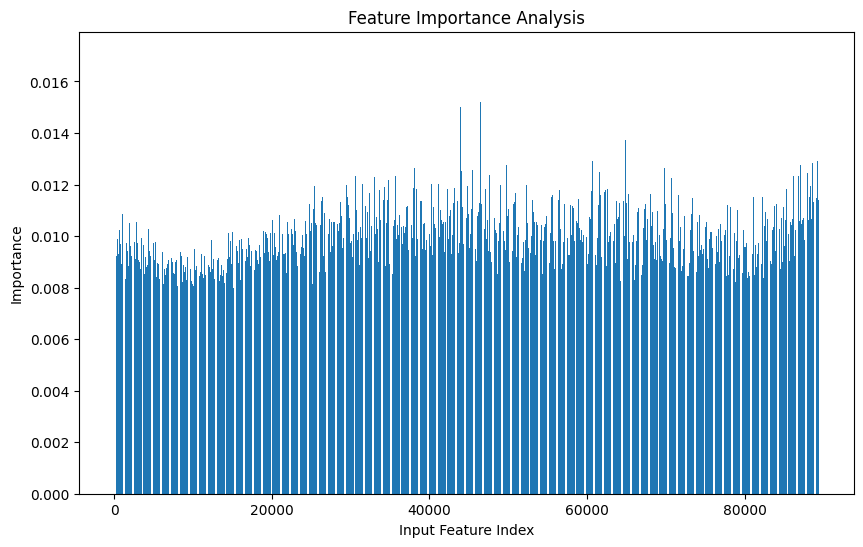

1/1 [==============================] - 0s 41ms/step


<Figure size 1000x600 with 0 Axes>

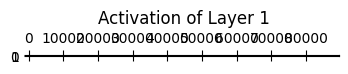

<Figure size 1000x600 with 0 Axes>

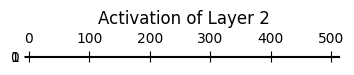

<Figure size 1000x600 with 0 Axes>

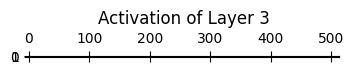

<Figure size 1000x600 with 0 Axes>

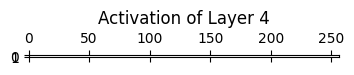

In [44]:
# Extract feature importance
weights = model_mlp.layers[1].get_weights()[0]  # Get weights of the first dense layer
feature_importance = np.mean(np.abs(weights), axis=1)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.title('Feature Importance Analysis')
plt.xlabel('Input Feature Index')
plt.ylabel('Importance')
plt.show()

# Layer visualization
layer_outputs = [layer.output for layer in model_mlp.layers[:4]]  # Visualize only the first few layers
activation_model = Model(inputs=model_mlp.input, outputs=layer_outputs)
sample_input = np.random.rand(1, 299, 299, 1)  # Generate a random sample input
activations = activation_model.predict(sample_input)

# Plot activations of each layer
for i, activation in enumerate(activations):
    plt.figure(figsize=(10, 6))
    if activation.ndim == 4:  # Check if activation is 4D (e.g., convolutional layer)
        plt.matshow(activation[0, :, :, 0], cmap='viridis', extent=(0, activation.shape[2], activation.shape[1], 0))
    elif activation.ndim == 3:  # Check if activation is 3D (e.g., recurrent layer)
        plt.matshow(activation[0].T, cmap='viridis', extent=(0, activation.shape[1], activation.shape[0], 0))
    else:  # Assume activation is 2D (e.g., dense layer)
        plt.matshow(activation.T, cmap='viridis', extent=(0, activation.shape[1], activation.shape[0], 0))
    plt.title('Activation of Layer {}'.format(i+1))
    plt.show()

### **RNN**

#### **Data Preparation**

In [182]:
# Reshape image data to fit RNN input format
X_train_rnn = X_train.reshape(X_train.shape[0], 299, 299)  # Reshape images into sequences of rows
X_val_rnn = X_val.reshape(X_val.shape[0], 299, 299)
X_test_rnn = X_test.reshape(X_test.shape[0], 299, 299)

In [183]:
print(f"x train rnn shape: {X_train_rnn.shape}")

x train rnn shape: (3334, 299, 299)


#### **Model Training**

In [130]:
# Model configuration
num_classes = 100

rnn_model = Sequential([
    SimpleRNN(128, input_shape=(299, 299), return_sequences=True),
    SimpleRNN(64, return_sequences=False),  # Adding another SimpleRNN layer
    Flatten(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_11 (SimpleRNN)   (None, 299, 128)          54784     
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 64)                12352     
                                                                 
 flatten_8 (Flatten)         (None, 64)                0         
                                                                 
 dense_49 (Dense)            (None, 256)               16640     
                                                                 
 dense_50 (Dense)            (None, 100)               25700     
                                                                 
Total params: 109,476
Trainable params: 109,476
Non-trainable params: 0
_________________________________________________________________


In [133]:
history = rnn_model.fit(X_train_rnn, y_train, validation_data=(X_val_rnn, y_val),
                        epochs=20, batch_size=16)

Epoch 1/20
209/209 [==============================] - 81s 386ms/step - loss: 4.5708 - accuracy: 0.0162 - val_loss: 4.5602 - val_accuracy: 0.0183
Epoch 2/20
209/209 [==============================] - 79s 377ms/step - loss: 4.4947 - accuracy: 0.0207 - val_loss: 4.5040 - val_accuracy: 0.0231
Epoch 3/20
209/209 [==============================] - 78s 375ms/step - loss: 4.4154 - accuracy: 0.0276 - val_loss: 4.4802 - val_accuracy: 0.0285
Epoch 4/20
209/209 [==============================] - 80s 383ms/step - loss: 4.3488 - accuracy: 0.0399 - val_loss: 4.4881 - val_accuracy: 0.0291
Epoch 5/20
209/209 [==============================] - 80s 384ms/step - loss: 4.2753 - accuracy: 0.0444 - val_loss: 4.4725 - val_accuracy: 0.0291
Epoch 6/20
209/209 [==============================] - 80s 385ms/step - loss: 4.2095 - accuracy: 0.0600 - val_loss: 4.5119 - val_accuracy: 0.0324
Epoch 7/20
209/209 [==============================] - 80s 384ms/step - loss: 4.1204 - accuracy: 0.0585 - val_loss: 4.5466 - val_ac

In [184]:
rnn_test_loss, rnn_test_acc = rnn_model.evaluate(X_test_rnn, y_test)
print(f'Test accuracy: {rnn_test_acc}')

105/105 [==============================] - 6s 59ms/step - loss: 5.4059 - accuracy: 0.0315
Test accuracy: 0.03150315210223198


#### **Ploting Model's Accuracy**

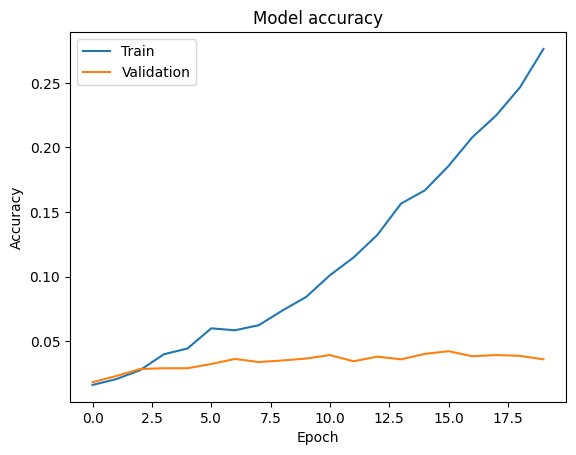

In [135]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### **Ploting Model's Loss**

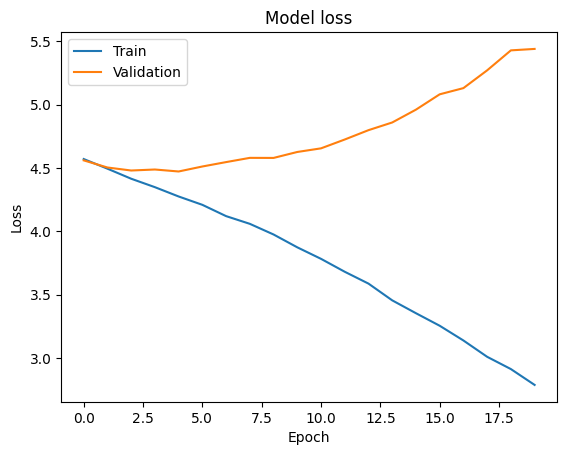

In [136]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### **Evaluating Model**

In [77]:
# Predict classes
predictions = rnn_model.predict(X_test_rnn)
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = test_df['Labels'].values

# Calculate precision, recall, and F1-score
rnn_precision = precision_score(true_classes, predicted_classes, average='macro')
rnn_recall = recall_score(true_classes, predicted_classes, average='macro')
rnn_f1 = f1_score(true_classes, predicted_classes, average='macro')

print("Precision: {:.4f}".format(rnn_precision))
print("Recall: {:.4f}".format(rnn_recall))
print("F1 Score: {:.4f}".format(rnn_f1))

105/105 [==============================] - 6s 54ms/step
Precision: 0.0321
Recall: 0.0315
F1 Score: 0.0293


#### **Saving and Loading Model**

In [138]:
# Saving model
rnn_model.save("rnn_model.h5")

In [74]:
# Load the saved model
rnn_model = load_model("rnn_model.h5")

#### **Explainable AI**

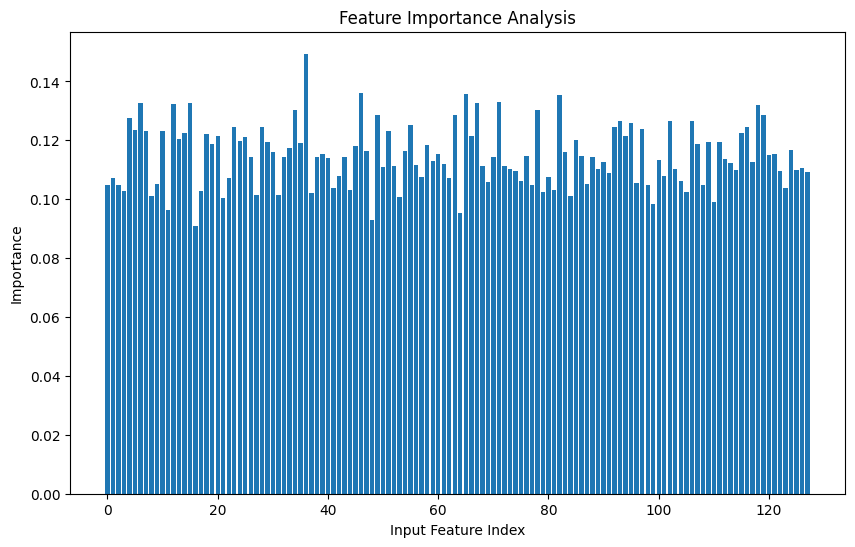

1/1 [==============================] - 0s 183ms/step


<Figure size 1000x600 with 0 Axes>

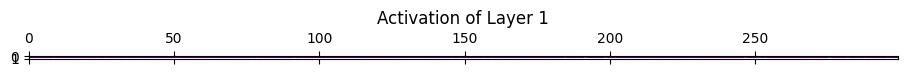

<Figure size 1000x600 with 0 Axes>

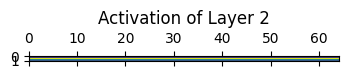

<Figure size 1000x600 with 0 Axes>

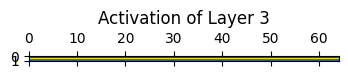

<Figure size 1000x600 with 0 Axes>

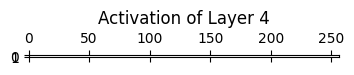

In [46]:
# Extract feature importance
weights = rnn_model.layers[1].get_weights()[0]  # Get weights of the first dense layer
feature_importance = np.mean(np.abs(weights), axis=1)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.title('Feature Importance Analysis')
plt.xlabel('Input Feature Index')
plt.ylabel('Importance')
plt.show()

# Layer visualization
layer_outputs = [layer.output for layer in rnn_model.layers[:4]]  # Visualize only the first few layers
activation_model = Model(inputs=rnn_model.input, outputs=layer_outputs)
sample_input = np.random.rand(1, 299, 299, 1)  # Generate a random sample input
activations = activation_model.predict(sample_input)

# Plot activations of each layer
for i, activation in enumerate(activations):
    plt.figure(figsize=(10, 6))
    if activation.ndim == 4:  # Check if activation is 4D (e.g., convolutional layer)
        plt.matshow(activation[0, :, :, 0], cmap='viridis', extent=(0, activation.shape[2], activation.shape[1], 0))
    elif activation.ndim == 3:  # Check if activation is 3D (e.g., recurrent layer)
        plt.matshow(activation[0].T, cmap='viridis', extent=(0, activation.shape[1], activation.shape[0], 0))
    else:  # Assume activation is 2D (e.g., dense layer)
        plt.matshow(activation.T, cmap='viridis', extent=(0, activation.shape[1], activation.shape[0], 0))
    plt.title('Activation of Layer {}'.format(i+1))
    plt.show()

### **LSTM**

#### **Model Training**

In [142]:
num_classes = 100

lstm_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(299, 299)),  # Input shape [time_steps, features]
    TimeDistributed(Dense(64, activation='relu')),
    Flatten(),
    Dense(num_classes, activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 299, 128)          219136    
                                                                 
 time_distributed (TimeDistr  (None, 299, 64)          8256      
 ibuted)                                                         
                                                                 
 flatten_9 (Flatten)         (None, 19136)             0         
                                                                 
 dense_52 (Dense)            (None, 100)               1913700   
                                                                 
Total params: 2,141,092
Trainable params: 2,141,092
Non-trainable params: 0
_________________________________________________________________


In [143]:
with tf.device(device_name):
    history = lstm_model.fit(X_train_rnn, y_train, validation_data=(X_val_rnn, y_val),
                        epochs=20, batch_size=16) # Will be using same x train as that of RNN

Epoch 1/20
209/209 [==============================] - 8s 30ms/step - loss: 4.6214 - accuracy: 0.0069 - val_loss: 4.6052 - val_accuracy: 0.0096
Epoch 2/20
209/209 [==============================] - 5s 24ms/step - loss: 4.6062 - accuracy: 0.0075 - val_loss: 4.6349 - val_accuracy: 0.0120
Epoch 3/20
209/209 [==============================] - 5s 23ms/step - loss: 4.5756 - accuracy: 0.0189 - val_loss: 4.6042 - val_accuracy: 0.0171
Epoch 4/20
209/209 [==============================] - 5s 23ms/step - loss: 4.4319 - accuracy: 0.0312 - val_loss: 4.7005 - val_accuracy: 0.0216
Epoch 5/20
209/209 [==============================] - 5s 23ms/step - loss: 4.2270 - accuracy: 0.0477 - val_loss: 4.7661 - val_accuracy: 0.0219
Epoch 6/20
209/209 [==============================] - 5s 23ms/step - loss: 4.0264 - accuracy: 0.0849 - val_loss: 5.1505 - val_accuracy: 0.0249
Epoch 7/20
209/209 [==============================] - 5s 23ms/step - loss: 3.8005 - accuracy: 0.1203 - val_loss: 5.6046 - val_accuracy: 0.0282

In [185]:
lstm_test_loss, lstm_test_acc = lstm_model.evaluate(X_test, y_test)
print(f'Test accuracy: {lstm_test_acc}')

105/105 [==============================] - 2s 12ms/step - loss: 18.5386 - accuracy: 0.0438
Test accuracy: 0.04380438104271889


#### **Ploting Model's Accuracy**

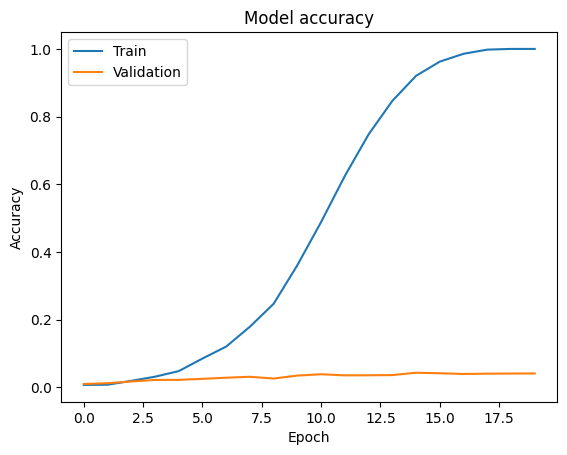

In [145]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### **Ploting Model's Loss**

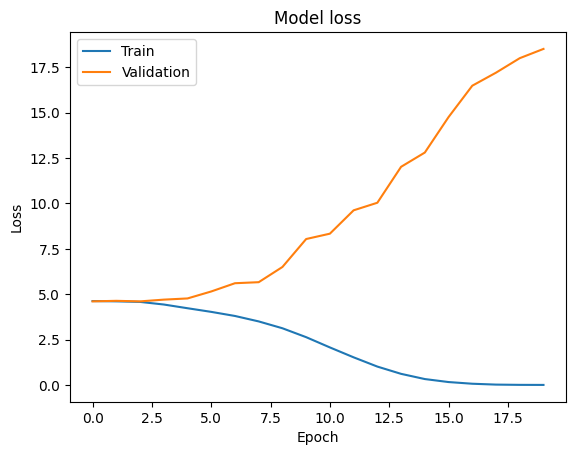

In [146]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### **Evaluating Model**

In [186]:
# Predict classes
predictions = lstm_model.predict(X_test_rnn) # Will be using same x test as that of RNN
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = test_df['Labels'].values

# Calculate precision, recall, and F1-score
lstm_precision = precision_score(true_classes, predicted_classes, average='macro')
lstm_recall = recall_score(true_classes, predicted_classes, average='macro')
lstm_f1 = f1_score(true_classes, predicted_classes, average='macro')

print("Precision: {:.4f}".format(lstm_precision))
print("Recall: {:.4f}".format(lstm_recall))
print("F1 Score: {:.4f}".format(lstm_f1))

105/105 [==============================] - 1s 11ms/step
Precision: 0.0441
Recall: 0.0438
F1 Score: 0.0431


#### **Saving and Loading Model**

In [148]:
# Saving model
lstm_model.save("lstm_model.h5")

In [78]:
# Load the saved model
lstm_model = load_model("lstm_model.h5")

#### **Explainable AI**

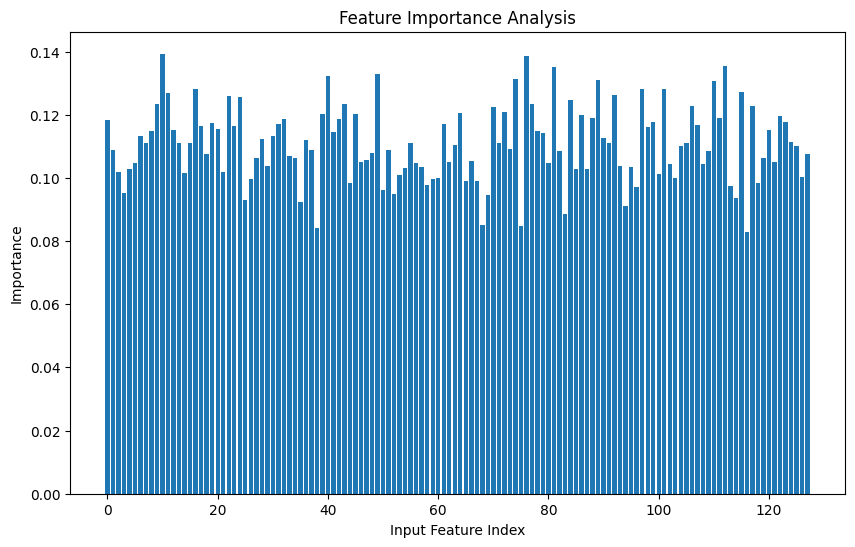

1/1 [==============================] - 2s 2s/step


<Figure size 1000x600 with 0 Axes>

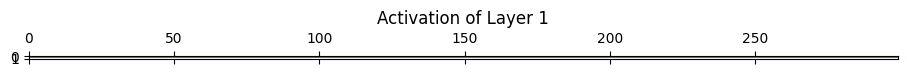

<Figure size 1000x600 with 0 Axes>

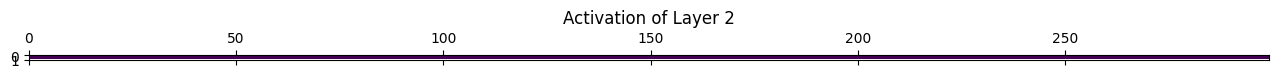

<Figure size 1000x600 with 0 Axes>

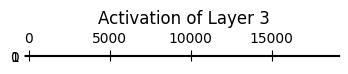

<Figure size 1000x600 with 0 Axes>

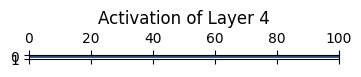

In [48]:
# Extract feature importance
weights = lstm_model.layers[1].get_weights()[0]  # Get weights of the first dense layer
feature_importance = np.mean(np.abs(weights), axis=1)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.title('Feature Importance Analysis')
plt.xlabel('Input Feature Index')
plt.ylabel('Importance')
plt.show()

# Layer visualization
layer_outputs = [layer.output for layer in lstm_model.layers[:4]]  # Visualize only the first few layers
activation_model = Model(inputs=lstm_model.input, outputs=layer_outputs)
sample_input = np.random.rand(1, 299, 299, 1)  # Generate a random sample input
activations = activation_model.predict(sample_input)

# Plot activations of each layer
for i, activation in enumerate(activations):
    plt.figure(figsize=(10, 6))
    if activation.ndim == 4:  # Check if activation is 4D (e.g., convolutional layer)
        plt.matshow(activation[0, :, :, 0], cmap='viridis', extent=(0, activation.shape[2], activation.shape[1], 0))
    elif activation.ndim == 3:  # Check if activation is 3D (e.g., recurrent layer)
        plt.matshow(activation[0].T, cmap='viridis', extent=(0, activation.shape[1], activation.shape[0], 0))
    else:  # Assume activation is 2D (e.g., dense layer)
        plt.matshow(activation.T, cmap='viridis', extent=(0, activation.shape[1], activation.shape[0], 0))
    plt.title('Activation of Layer {}'.format(i+1))
    plt.show()

### **Transformer**

#### **Data Augmentation**

In [83]:
# Define data augmentation transformations
train_transform = transforms.Compose([
    RandomRotation(degrees=15),
    RandomHorizontalFlip(p=0.5),
    RandomVerticalFlip(p=0.5),
    ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    Resize((224, 224)),
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Imagenet normalization
])

val_transform = transforms.Compose([
    Resize((224, 224)),
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [93]:
# Custom Dataset class to handle image paths
class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        img = Image.fromarray(self.X[idx])
        label = self.y[idx]

        if self.transform:
            img = self.transform(img)

        return img, label

# Create PyTorch datasets with data augmentation
train_dataset = ImageDataset(X_train, y_train, transform=train_transform)
val_dataset = ImageDataset(X_val, y_val, transform=val_transform)
test_dataset = ImageDataset(X_test, y_test, transform=val_transform)

In [94]:
# Create PyTorch dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#### **Model Training**

In [82]:
class ResNetTransformer(nn.Module):
    def __init__(self, num_classes):
        super(ResNetTransformer, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        self.resnet.fc = nn.Identity()  # Remove the last fully connected layer
        self.transformer_encoder = nn.TransformerEncoderLayer(d_model=512, nhead=8)
        self.fc = nn.Linear(512, num_classes)
        
    def forward(self, x):
        features = self.resnet(x)
        features = features.view(features.size(0), -1)  # Flatten spatial dimensions
        features = features.unsqueeze(0)  # Add batch dimension
        output = self.transformer_encoder(features)
        output = output.mean(dim=1)  # Global average pooling
        output = self.fc(output)
        return output

In [56]:
# Initialize the model
transformer_model = ResNetTransformer(num_classes=100)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(transformer_model.parameters(), lr=0.001)

In [63]:
num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device:", device)
transformer_model.to(device)

for epoch in range(num_epochs):
    transformer_model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = transformer_model(images)
        outputs = outputs.squeeze(0)  # Remove the extra dimension
        outputs = outputs.repeat(labels.size(0), 1)  # Repeat the output to match the batch size of labels
        labels = labels.long()  # Convert labels to Long data type

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        
        _, predicted = torch.max(outputs, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(train_dataset)
    epoch_accuracy = correct_predictions / total_predictions
    
    # Validation loop
    transformer_model.eval()
    val_running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = transformer_model(images)
            outputs = outputs.squeeze(0)  # Remove the extra dimension
            outputs = outputs.repeat(labels.size(0), 1)  # Repeat the output to match the batch size of labels
            labels = labels.long()  # Convert labels to Long data type
            val_loss = criterion(outputs, labels)
            val_running_loss += val_loss.item() * images.size(0)
            
            _, predicted = torch.max(outputs, 1)
            total_predictions += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()
    
    val_epoch_loss = val_running_loss / len(val_dataset)
    val_accuracy = correct_predictions / total_predictions
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Acc: {epoch_accuracy:.4f}, Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_accuracy:.4f}')


Device: cpu
Epoch 1/10, Loss: 4.8349, Acc: 0.0081, Val Loss: 4.7200, Val Acc: 0.0099
Epoch 2/10, Loss: 4.7287, Acc: 0.0087, Val Loss: 4.6859, Val Acc: 0.0099
Epoch 3/10, Loss: 4.7197, Acc: 0.0084, Val Loss: 4.6941, Val Acc: 0.0099
Epoch 4/10, Loss: 4.7054, Acc: 0.0066, Val Loss: 4.6721, Val Acc: 0.0099
Epoch 5/10, Loss: 4.6922, Acc: 0.0087, Val Loss: 4.6555, Val Acc: 0.0102
Epoch 6/10, Loss: 4.6773, Acc: 0.0048, Val Loss: 4.6598, Val Acc: 0.0099
Epoch 7/10, Loss: 4.6788, Acc: 0.0087, Val Loss: 4.6438, Val Acc: 0.0099
Epoch 8/10, Loss: 4.6649, Acc: 0.0060, Val Loss: 4.6435, Val Acc: 0.0099
Epoch 9/10, Loss: 4.6628, Acc: 0.0102, Val Loss: 4.6455, Val Acc: 0.0099
Epoch 10/10, Loss: 4.6578, Acc: 0.0069, Val Loss: 4.6302, Val Acc: 0.0102


In [104]:
# Testing loop
transformer_model.eval()
test_correct_predictions = 0
test_total_predictions = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to('cpu'), labels.to('cpu')
        outputs = transformer_model(images)
        _, predicted = torch.max(outputs, 1)
        test_total_predictions += labels.size(0)
        test_correct_predictions += (predicted == labels).sum().item()

transformer_test_accuracy = test_correct_predictions / test_total_predictions
print(f'Test Accuracy: {transformer_test_accuracy:.4f}')

Test Accuracy: 0.0099


#### **Save and Load Model**

In [66]:
model_path = 'transformer_model.pth'

# Save the trained model
torch.save(transformer_model.state_dict(), model_path)

In [88]:
model_path = 'transformer_model.pth'
transformer_model = ResNetTransformer(num_classes=100)
transformer_model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

### **GAN**

#### **Data Preparation**

In [109]:
def load_image_gan(image_path, new_size=img_size):
    root = "archive/fgvc-aircraft-2013b/fgvc-aircraft-2013b/data/images/"
    img = Image.open(root+image_path)
    img = img.convert('L')
    img = img.resize((320, 320))
    image = (np.array(img) - 127.5) / 127.5
    
    return image

In [120]:
data_image = []
for index, row in train_df.iterrows():
    if row['Labels'] == 0:
        img = load_image_gan(row['filename'])
        data_image.append(img)

In [121]:
train_images = np.array(data_image).reshape(np.array(data_image).shape[0], 320, 320, 1).astype('float32')
BUFFER_SIZE = 100
BATCH_SIZE = 10
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

#### **Generator**

In [106]:
def make_generator_model():
    input_1 = Input(shape=(100,), name="Input_image")
    x = Dense(10 * 10 * 256, use_bias=False)(input_1)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Reshape((10, 10, 256))(x)
    x = Conv2DTranspose(256, (1, 1), strides=(1, 1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Conv2DTranspose(32, (7, 7), strides=(2, 2), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Conv2DTranspose(16, (9, 9), strides=(2, 2), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Conv2DTranspose(1, (11, 11), strides=(2, 2), padding='same', use_bias=False, activation='tanh')(x)
    model = Model(inputs=input_1, outputs=x)
    
    return model

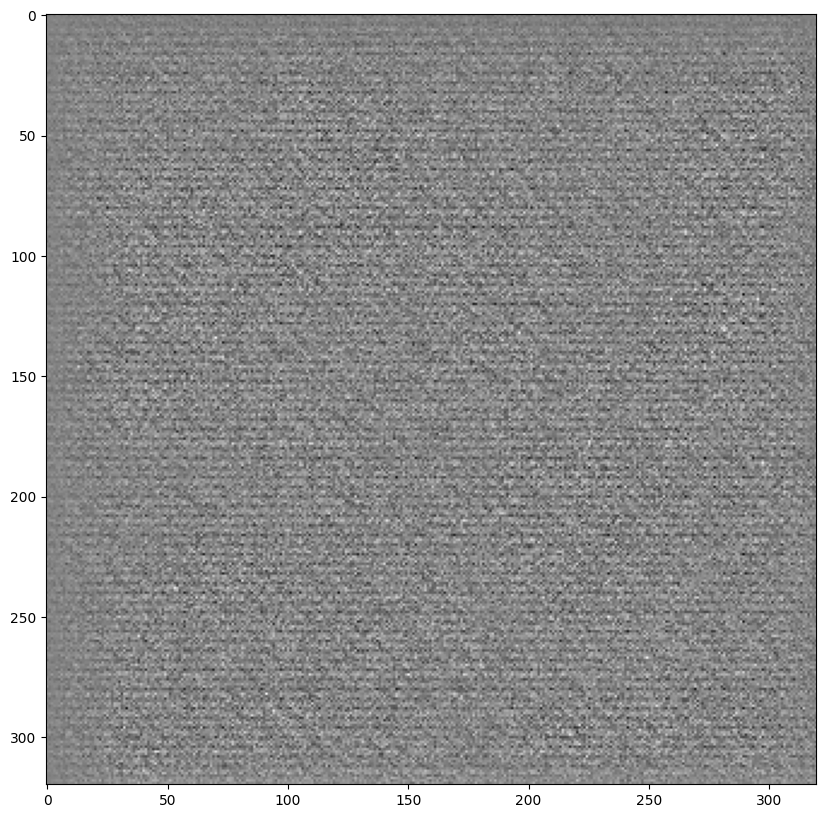

In [107]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray');

#### **Discriminator**

In [112]:
def make_discriminator_model():
    input_1 = Input(shape=(320, 320, 1), name = "Input_image")
    x = Conv2D(16, (11, 11), strides=(2, 2), padding='same')(input_1)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    x = Conv2D(32, (9, 9), strides=(2, 2), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    x = Conv2D(128, (5, 5), strides=(2, 2), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    x = Conv2D(256, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    x = Conv2D(256, (1, 1), strides=(1, 1), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)
    x = Dense(1)(x)
    model = Model(inputs=input_1, outputs=x)
    
    return model

In [113]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-1.5426363e-05]], shape=(1, 1), dtype=float32)


#### **Build Model**

In [114]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [115]:
EPOCHS = 6000
noise_dim = 100
num_examples_to_generate = 1

seed = tf.random.normal([num_examples_to_generate, noise_dim])

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    if (epoch + 1) % 500 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [118]:
def generate_and_save_images(model, epoch, test_input):
  predictions = model(test_input, training=False)
  fig = plt.figure(figsize=(12, 12))
  plt.imshow(predictions[0, :, :, 0] * 127.5 + 127.5, cmap='gray')
  plt.axis('off')
  plt.savefig('gan_images/image_at_epoch_{:04d}.png'.format(epoch), bbox_inches='tight', pad_inches=0)
  plt.show()

#### **Model Training**

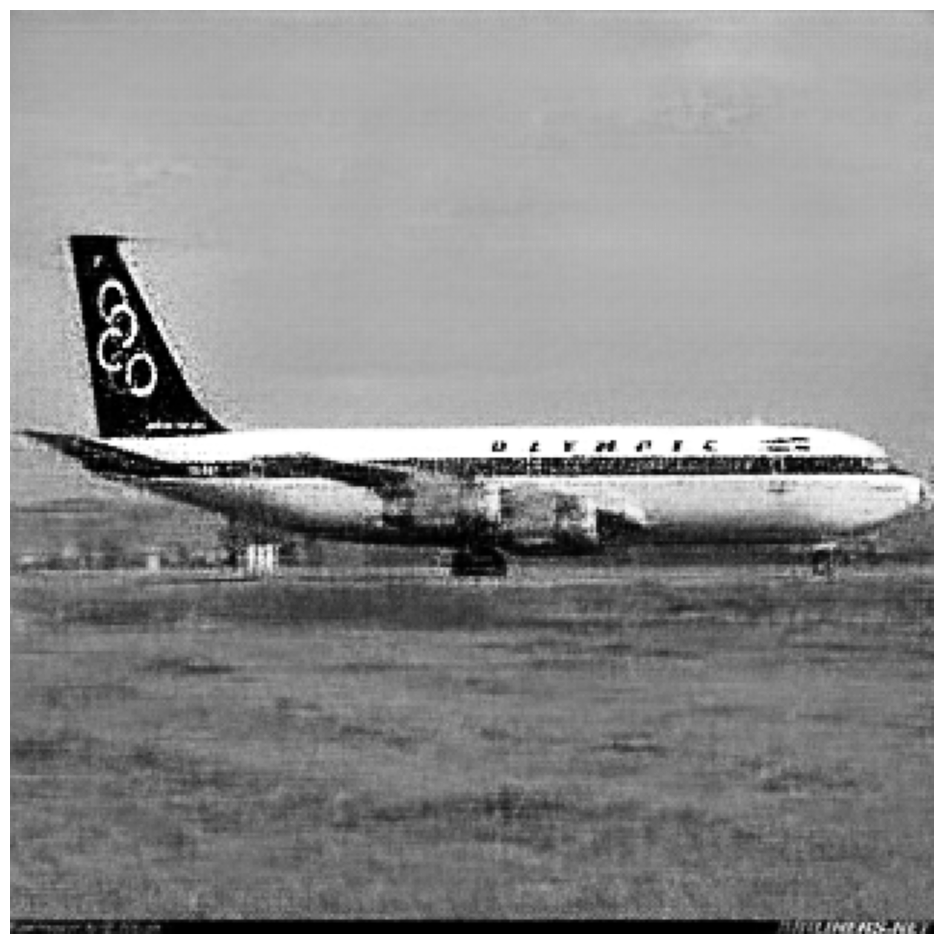

In [122]:
with tf.device(device_name):
    train(train_dataset, EPOCHS)

#### **Save and Load Model**

In [123]:
# Save generator and discriminator models
generator.save('generator_model')
discriminator.save('discriminator_model')

INFO:tensorflow:Assets written to: generator_model\assets


INFO:tensorflow:Assets written to: generator_model\assets


INFO:tensorflow:Assets written to: discriminator_model\assets


INFO:tensorflow:Assets written to: discriminator_model\assets


In [124]:
# Load generator model
generator = tf.saved_model.load('generator_model')

# Load discriminator model
discriminator = tf.saved_model.load('discriminator_model')

#### **Test Image**

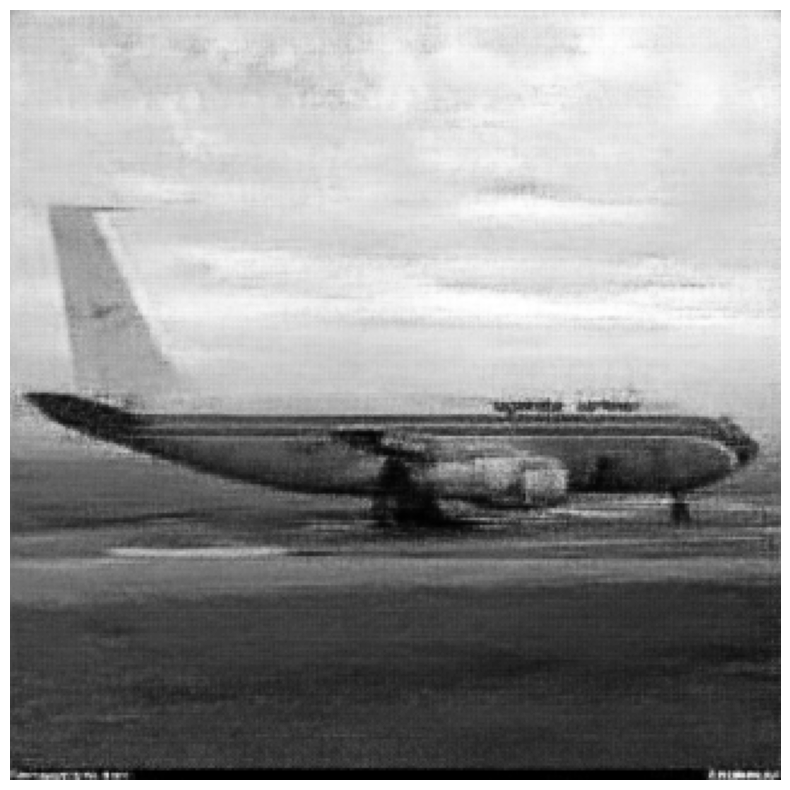

In [143]:
noise = tf.random.normal([BATCH_SIZE, noise_dim])

# Generate image using the generator model
generated_image = generator(noise, training=False)

# Plot the generated image
plt.imshow(generated_image[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.show()

## **Machine Learning Models**

### **Data Sampling And Preparation**

In [151]:
# Define the number of instances per class
instances_per_class = 10

# Create new dataframes
new_train_dfs = []
new_test_dfs = []
new_val_dfs = []

# Group original dataframes by labels
train_groups = train_df.groupby('Labels')
test_groups = test_df.groupby('Labels')
val_groups = val_df.groupby('Labels')

# Sample instances for each class
for class_label in range(100):
    # Sample instances from original dataframes
    train_sampled = train_groups.get_group(class_label).sample(instances_per_class)
    test_sampled = test_groups.get_group(class_label).sample(instances_per_class)
    val_sampled = val_groups.get_group(class_label).sample(instances_per_class)
    
    # Append sampled instances to lists
    new_train_dfs.append(train_sampled)
    new_test_dfs.append(test_sampled)
    new_val_dfs.append(val_sampled)

# Concatenate sampled dataframes
new_train_df = pd.concat(new_train_dfs, ignore_index=True)
new_test_df = pd.concat(new_test_dfs, ignore_index=True)
new_val_df = pd.concat(new_val_dfs, ignore_index=True)

# Shuffle new dataframes
new_train_df = new_train_df.sample(frac=1).reset_index(drop=True)
new_test_df = new_test_df.sample(frac=1).reset_index(drop=True)
new_val_df = new_val_df.sample(frac=1).reset_index(drop=True)

In [152]:
new_train_df[new_train_df['Labels']==0]

filename  Classes  Labels
22   1025794.jpg  707-320       0
50   1319365.jpg  707-320       0
324  0894380.jpg  707-320       0
596  1427680.jpg  707-320       0
671  0869722.jpg  707-320       0
749  0698580.jpg  707-320       0
851  0610657.jpg  707-320       0
858  1082409.jpg  707-320       0
909  0482761.jpg  707-320       0
916  0817494.jpg  707-320       0

In [153]:
X_train = load_X_train(new_train_df)
X_val = load_X_val(new_val_df)
X_test = load_X_test(new_test_df)

In [154]:
num_samples = 1000

X_train = [preprocessing_image(image) for image in X_train]
X_train = np.array(X_train).reshape(num_samples, -1)  # Flatten images
X_val = [preprocessing_image(image) for image in X_val]
X_val = np.array(X_val).reshape(num_samples, -1)  # Flatten images
X_test = [preprocessing_image(image) for image in X_test]
X_test = np.array(X_test).reshape(num_samples, -1)  # Flatten images

In [155]:
y_train,y_val,y_test = load_labels(train=new_train_df,val=new_val_df,test=new_test_df)

In [156]:
X_train.shape # 299 x 299 = 89401

(1000, 89401)

In [157]:
y_train.shape

(1000,)

### **SVM**

In [43]:
# Define SVM model
svm_model = SVC(kernel='rbf', C=1.0, probability=True)

# Fit SVM model
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [165]:
# Evaluate on validation set
val_pred = svm_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.037


In [164]:
# Evaluate on test set
test_pred = svm_model.predict(X_test)
svm_test_accuracy = accuracy_score(y_test, test_pred)
print("Test Accuracy:", svm_test_accuracy)

Test Accuracy: 0.032


#### **Evaluating Model**

In [166]:
# Calculate precision, recall, and F1-score
svm_precision = precision_score(y_test, test_pred, average='macro')
svm_recall = recall_score(y_test, test_pred, average='macro')
svm_f1 = f1_score(y_test, test_pred, average='macro')

print("Precision: {:.4f}".format(svm_precision))
print("Recall: {:.4f}".format(svm_recall))
print("F1 Score: {:.4f}".format(svm_f1))

Precision: 0.0522
Recall: 0.0320
F1 Score: 0.0271


#### **Save and Load Model**

In [54]:
# Save the trained model to a file
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

In [163]:
with open('svm_model.pkl', 'rb') as f:
    svm_model = pickle.load(f)

### **Logistic Regression**

In [48]:
# Create a logistic regression model
log_reg_model = LogisticRegression(multi_class='ovr', max_iter=1000)

log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [115]:
# Evaluate on validation set
val_pred = log_reg_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.063


In [160]:
# Evaluate on test set
test_pred = log_reg_model.predict(X_test)
reg_test_accuracy = accuracy_score(y_test, test_pred)
print("Test Accuracy:", reg_test_accuracy)

Test Accuracy: 0.061


#### **Evaluating Model**

In [161]:
# Calculate precision, recall, and F1-score
log_precision_2 = precision_score(y_test, test_pred, average='macro')
log_recall_2 = recall_score(y_test, test_pred, average='macro')
log_f1_2 = f1_score(y_test, test_pred, average='macro')

print("Precision: {:.4f}".format(log_precision_2))
print("Recall: {:.4f}".format(log_recall_2))
print("F1 Score: {:.4f}".format(log_f1_2))

Precision: 0.0655
Recall: 0.0610
F1 Score: 0.0606


#### **Save and Load Model**

In [53]:
# Save the trained model to a file
with open('log_reg_model.pkl', 'wb') as f:
    pickle.dump(log_reg_model, f)

In [114]:
with open('log_reg_model.pkl', 'rb') as f:
    log_reg_model = pickle.load(f)

# **Results & Visualizations**

In [187]:
# Define dictionaries to store metrics
metrics = {
    'Model': [],
    'Test Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
}

# CNN Trained with Preprocessed Data
metrics['Model'].append('CNN Trained with Preprocessed Data')
metrics['Test Accuracy'].append(cnn_test_accuracy_1)
metrics['Precision'].append(cnn_precision_1)
metrics['Recall'].append(cnn_recall_1)
metrics['F1 Score'].append(cnn_f1_1)

# CNN Trained with Data Augmentation
metrics['Model'].append('CNN Trained with Data Augmentation')
metrics['Test Accuracy'].append(cnn_test_accuracy_2)
metrics['Precision'].append(cnn_precision_2)
metrics['Recall'].append(cnn_recall_2)
metrics['F1 Score'].append(cnn_f1_2)

# Transfer Learning: ResNet-50
metrics['Model'].append('Transfer Learning: ResNet-50')
metrics['Test Accuracy'].append(res_test_accuracy)
metrics['Precision'].append(res_precision)
metrics['Recall'].append(res_recall)
metrics['F1 Score'].append(res_f1)

# Transfer Learning: VGG19
metrics['Model'].append('Transfer Learning: VGG19')
metrics['Test Accuracy'].append(vgg_test_accuracy)
metrics['Precision'].append(vgg_precision)
metrics['Recall'].append(vgg_recall)
metrics['F1 Score'].append(vgg_f1)

# Multi Layer Perceptron MLP
metrics['Model'].append('Multi Layer Perceptron MLP')
metrics['Test Accuracy'].append(mlp_test_acc)
metrics['Precision'].append(mlp_precision)
metrics['Recall'].append(mlp_recall)
metrics['F1 Score'].append(mlp_f1)

# RNN
metrics['Model'].append('RNN')
metrics['Test Accuracy'].append(rnn_test_acc)
metrics['Precision'].append(rnn_precision)
metrics['Recall'].append(rnn_recall)
metrics['F1 Score'].append(rnn_f1)

# LSTM
metrics['Model'].append('LSTM')
metrics['Test Accuracy'].append(lstm_test_acc)
metrics['Precision'].append(lstm_precision)
metrics['Recall'].append(lstm_recall)
metrics['F1 Score'].append(lstm_f1)

# Transformer
metrics['Model'].append('Transformer')
metrics['Test Accuracy'].append(transformer_test_accuracy)
metrics['Precision'].append(np.nan)
metrics['Recall'].append(np.nan)
metrics['F1 Score'].append(np.nan)

# SVM
metrics['Model'].append('SVM')
metrics['Test Accuracy'].append(svm_test_accuracy)
metrics['Precision'].append(svm_precision)
metrics['Recall'].append(svm_recall)
metrics['F1 Score'].append(svm_f1)

# Logistic Regression
metrics['Model'].append('Logistic Regression')
metrics['Test Accuracy'].append(reg_test_accuracy)
metrics['Precision'].append(log_precision_2)
metrics['Recall'].append(log_recall_2)
metrics['F1 Score'].append(log_f1_2)

In [190]:
# Create DataFrame
df = pd.DataFrame(metrics)
df

Model  Test Accuracy  Precision    Recall  \
0  CNN Trained with Preprocessed Data       0.117012   0.130159  0.117032   
1  CNN Trained with Data Augmentation       0.280828   0.007968  0.007531   
2        Transfer Learning: ResNet-50       0.509151   0.009527  0.010205   
3            Transfer Learning: VGG19       0.009901   0.000099  0.010000   
4          Multi Layer Perceptron MLP       0.024002   0.005681  0.011649   
5                                 RNN       0.031503   0.032143  0.031497   
6                                LSTM       0.043804   0.044051  0.043824   
7                         Transformer       0.009901        NaN       NaN   
8                                 SVM       0.032000   0.052198  0.032000   
9                 Logistic Regression       0.061000   0.065490  0.061000   

   F1 Score  
0  0.116273  
1  0.007498  
2  0.009400  
3  0.000196  
4  0.005794  
5  0.029347  
6  0.043141  
7       NaN  
8  0.027067  
9  0.060638

## **Bar Chart of Test Accuracy**

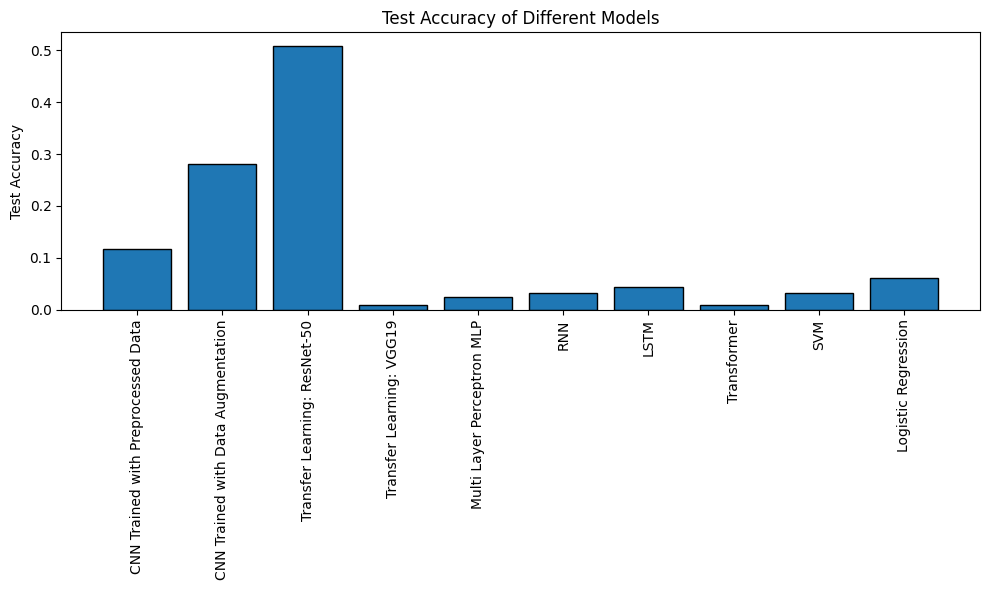

In [198]:
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Test Accuracy'],ec='black')
plt.xticks(rotation=90)
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy of Different Models')
plt.tight_layout()
plt.show()

## **Bar Chart for Precision**

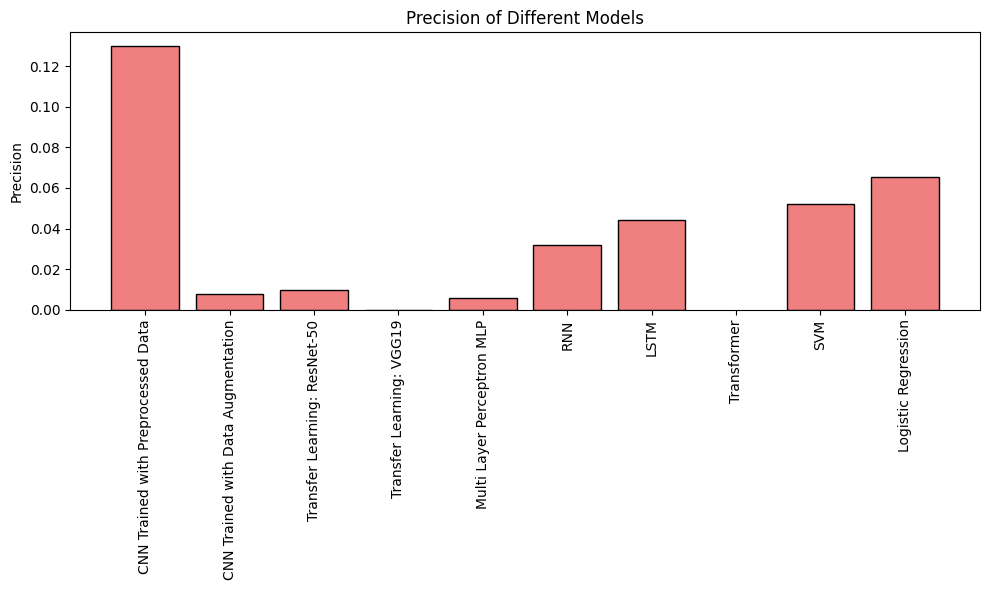

In [197]:
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Precision'], color='lightcoral',ec='black')
plt.xticks(rotation=90)
plt.ylabel('Precision')
plt.title('Precision of Different Models')
plt.tight_layout()
plt.show()

## **Bar Chart for Recall**

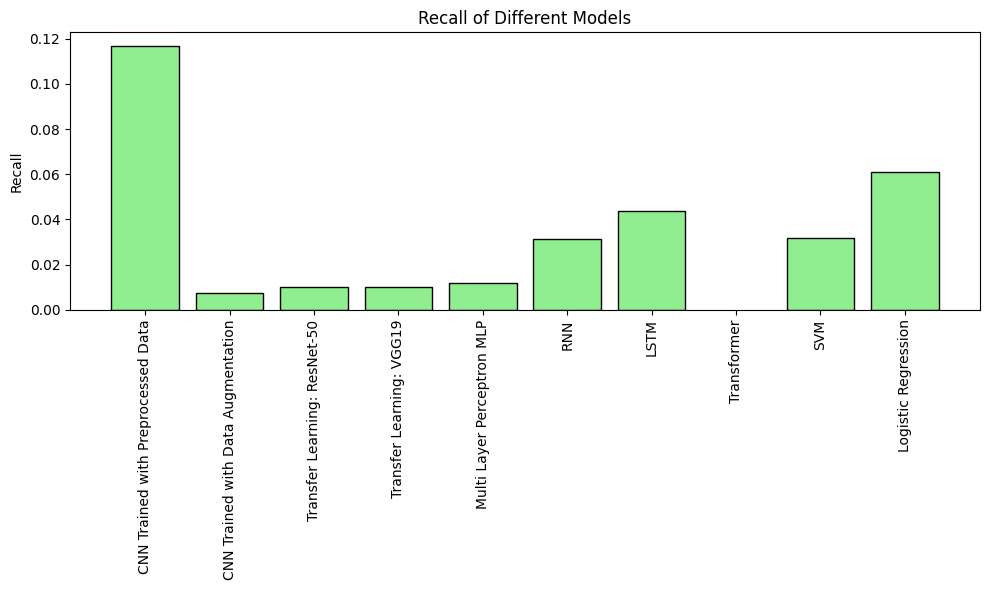

In [196]:
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Recall'], color='lightgreen',ec='black')
plt.xticks(rotation=90)
plt.ylabel('Recall')
plt.title('Recall of Different Models')
plt.tight_layout()
plt.show()

## **Bar Chart for F1 Score**

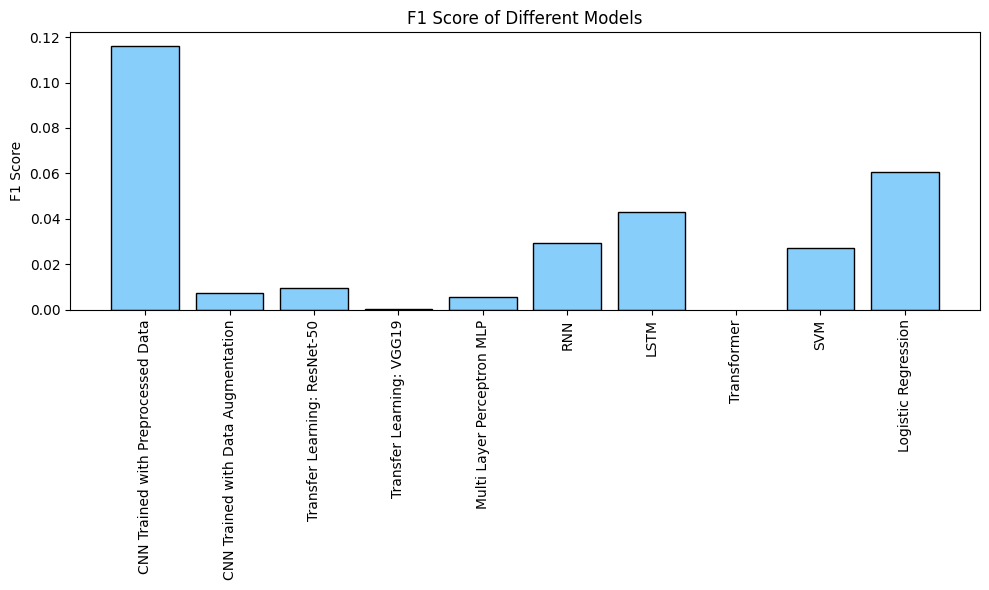

In [199]:
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['F1 Score'], color='lightskyblue',ec='black')
plt.xticks(rotation=90)
plt.ylabel('F1 Score')
plt.title('F1 Score of Different Models')
plt.tight_layout()
plt.show()